### Nanyang Technology University, SC3000, Artificial Intelligence

### Tutorial: SCS4, Teaching Assistant: Miss XU YUEXUAN

### Authors:


*   Gay Ming Kai
*   Tng Jun Wen
*   Yeo Feng Ren


# Assignment 1: Balancing a Pole on a Cart

## Flow of Notebook

* Chapter 1. Problem
  * Chapter 1.1. Problem Description
  * Chapter 1.2. Action Space
  * Chapter 1.3. State Space (Observation)
  * Chapter 1.4. Conditions
  * Chatper 1.5. Reinforcement Learning Algorithms (Solution)
* Chapter 2. Library Setup
  * Chapter 2.1 Install Dependencies (Run Once Only)
  * Chapter 2.2 Import Library
  * Chapter 2.3 Environment Setup
* Chapter 3. Model Training
* Chapter 4. Task 1 (Model Testing)
* Chapter 5. Task 2 (Average Score)
  * Chapter 5.1. Task 2 Extended (Hyperparametering DQN)
* Chapter 6. Task 3 (One Episode)
* Chapter 7. Additional Task (Best Model)


# Chapter 1. Problem

## Chapter 1.1. Problem Description

CartPole is a classic reinforcement learning problem. The goal is to balance a pole placed upright on the cart that is attached to an un-actuataed joint of a cart which moves along a frictionless track. To balance the pole, forces have to be applied to either the left or right direction on the cart. In this project, we will develop a Reinforcement Learning (RL) agent. The trained agent makes the decision to apply force on either the left or right of the cart depending on the cart position, velocity, and the pole angle, angular velocity.

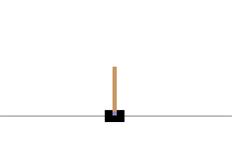

## Chapter 1.2. Action Space

The action space is an N-dimensional array (ndarray) with shape (1,) capable of taking values of [0,1]. TThese values correspond to pushing the cart left (0) or right (1). Since the action space is discrete, the force applied to the cart is not directly controlled by the agent. Instead the magnitude of the applied force is fixed, and the system dynamics such as the pole's angle and velocity determine how the cart and pole respond to each action.

## Chapter 1.3. State Space (Observation)

The state space also known as observation, is an N-Dimensional array (Ndarray) with shape (4,) with a vector of 4 values corresponding to the positons and velocities represented by the table below

| Num | Observation            | Min                  | Max                  |
|---------------|------------------------|----------------------|----------------------|
|   0             | Cart Position          | -4.8                 | 4.8                  |
|   1             | Cart Velocity          | -∞                   | ∞                    |
|   2             | Pole Angle             | ~ -0.418 rad (-24°)  | ~ 0.418 rad (24°)   |
|   3             | Pole Angular Velocity  | -∞                   | ∞                    |


## Chapter 1.4. Conditions
The challenge is to balance the pole for 500 states per episode

The environment will be terminated if any of the conditions below is violated

*   Pole Angle is at most ±12°
*   The cart is at most ±2.4



## Chapter 1.5. Reinforcement Learning Algorithm

There are 4 popular reinforcement learning algorithm that are commonly used.

* Deep Q-Network (DQN)
* Policy Gradient (PG)
* Advantage Actor-Critic (A2C)
* Proximal Policy Optimization (PPO)

### Deep Q-Nework (DQN)

DQN is a value-based reinforcement learning algorithm that uses a neural network to approximate the Q-value function.

It learns by updating the Q-values using the Bellman Equation and utilizes experience replay and a target network to stabilize training.

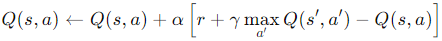

* Q(s,a) → Q-value (expected future reward for state
𝑠
s and action
𝑎
a).
𝑟
* r → Reward received after taking action
𝑎
a.
𝑠
′
* s
′
  → Next state after taking action.
* 𝛾 → Discount factor (controls future rewards' importance).
* max
⁡
𝑎
′
𝑄
(
𝑠
′
,
𝑎
′
)
 → Best estimated Q-value for the next state.
* 𝛼 → Learning rate (step size for updates).


### Policy Gradient (PG)
PG is a policy-based algorithm that directly optimizes the policy π instead of estimating Q-values.

It uses gradient ascent on the expected reward to adjust the policy and can be trained stochastically.

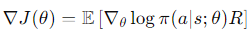

* J(θ) → Objective function (expected total reward).
𝜋
(
𝑎
∣
𝑠
;
𝜃
)
* π (a∣s;θ) → Policy function (probability of taking action
𝑎
a in state
𝑠
s).
*𝑅 → Total reward received from a trajectory.
* ∇
𝜃
log
⁡
𝜋
(
𝑎
∣
𝑠
;
𝜃
)
∇
θ
​
 logπ(a∣s;θ) → Policy gradient used to update the parameters.


### Advantage Actor-Critic (A2C)
A2C combines both value-based and policy-based approaches by having an Actor and a Critic.

* The Actor selects actions, similar to Policy Gradient.
* The Critic estimates the value function, similar to DQN.
* The Advantage function helps reduce variance in training, improving stability.

Actor (Policy Update)

image.png

Critic (Advantage Estimation)

image.png

* A(s,a) → Advantage function (how much better an action is compared to the average action).
* 𝑉
(
𝑠
) → Value function (expected return from state
𝑠
s).
𝑄
(
𝑠
,
𝑎
)
* Q(s,a) → Action-value function (expected return after taking action
𝑎
a).

### Proximal Policy Optimization (PPO)
PPO is a policy gradient-based algorithm that improves stability by limiting updates to the policy using a clipping function and performing multiple epochs of training per batch.

It is considerably less sensitive to hyperparameters compared to A2C.

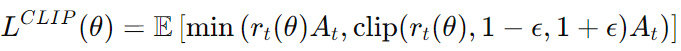

* r[t]
(θ)=
π [θ] (a
[t]
​ ∣ s [t]
​
 ) / π [θ old] (a
[t]
​ ∣ s [t]
​
 )
  → Probability ratio between the new and old policy.
* 𝜖 → Clipping parameter (prevents drastic updates).
* A[t]
  → Advantage function.

# Chapter 2. Library Setup

This chapter sets up the necessary libraries and dependencies required for training and evaluating reinforcement learning models using Stable-Baselines3. It includes steps for installing dependencies, importing essential libraries, and configuring the environment for model training.

## Chapter 2.1. Install Dependencies (Run Once Only)

Before running the reinforcement learning models, all necessary libraries must be installed. This section ensures that `Gym`, `Shimmy` and `Stable-Baselines3` are installed in the environment. The installation command is designed to run only once, preventing redundant installations.

In [1]:
#Install Dependencies (Only Required to Run Once)
!pip install gym shimmy stable_baselines3 >nul 2>&1

## Chapter 2.2. Import Libraries

Once the dependencies are installed, the required Python libraries are imported:

* `gym` – Provides the simulation environment (CartPole).
* `numpy` – Supports numerical operations for processing observations and rewards.
* `DQN, PPO, A2C` from `stable_baselines3` – Prebuilt reinforcement learning models for training.
* `make_vec_env` from `stable_baselines3.common.env_util` – Helps create vectorized environments, allowing multiple simulations to run in parallel for better training efficiency.
* `matplotlib.pyplot` – Provides functions for plotting graphs and visualizing data in reinforcement learning experiments.

In [2]:
import gym
import os
import numpy as np
np.bool8 = np.bool_
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.env_util import make_vec_env
import matplotlib.pyplot as plt

## Chapter 2.3. Environment Setup

This section initializes the CartPole-v1 environment, which serves as the simulation space for the reinforcement learning models. Two different environments are set up:

1. `gym.make("CartPole-v1")` – A standard single-instance environment, useful for testing.
2. `make_vec_env("CartPole-v1", n_envs=4)` – A vectorized environment with 4 parallel instances, required for algorithms like A2C and PPO, which benefit from multiple simultaneous rollouts.

This setup ensures that the models have a proper simulation space to interact with and learn from.

In [3]:
env = gym.make("CartPole-v1")
env = make_vec_env("CartPole-v1", n_envs=4)

# Chapter 3. Model Training

This chapter focuses on training four different reinforcement learning models (DQN, PG, A2C, PPO) on the CartPole-v1 environment. Each model follows a specific learning strategy and runs for 30,000 timesteps to optimize its policy for balancing the pole.

* Policy: `MlpPolicy` default policy for environments with vector (non-image observation)
* Training Duration: `30,000` timesteps.
* Verbose Output: `verbose=1` (prints training logs).
* Progress Bar: enabled for better visualisation

In [4]:
models = {}

# ======================= DQN =======================
print("Training DQN...")
dqn_model = DQN("MlpPolicy", env, verbose=1)
dqn_model.learn(total_timesteps=30000, progress_bar=True)
models["DQN"] = dqn_model

# ======================= Policy Gradient (REINFORCE) =======================
print("Training PG (Using PPO as a policy gradient method)...")
pg_model = PPO("MlpPolicy", env, verbose=1)  # PPO is a stable PG method
pg_model.learn(total_timesteps=30000, progress_bar=True)
models["PG"] = pg_model

# ======================= A2C =======================
print("Training A2C...")
a2c_env = make_vec_env("CartPole-v1", n_envs=4)
a2c_model = A2C("MlpPolicy", a2c_env, verbose=1)
a2c_model.learn(total_timesteps=30000, progress_bar=True)
models["A2C"] = a2c_model

# ======================= PPO =======================
print("Training PPO...")
ppo_env = make_vec_env("CartPole-v1", n_envs=4)
ppo_model = PPO("MlpPolicy", ppo_env, verbose=1)
ppo_model.learn(total_timesteps=30000, progress_bar=True)
models["PPO"] = ppo_model

print("Training completed for all models!")

Training DQN...
Using cpu device


C:\Users\Fengren\AppData\Local\Programs\Python\Python312\Lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3999     |
|    time_elapsed     | 0        |
|    total_timesteps  | 104      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.946    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3185     |
|    time_elapsed     | 0        |
|    total_timesteps  | 172      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.521    |
|    n_updates        | 4        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

Training PG (Using PPO as a policy gradient method)...
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    fps             | 4399     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 36.2        |
|    ep_rew_mean          | 36.2        |
| time/                   |             |
|    fps                  | 1859        |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014854546 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |


Training A2C...
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 29.2     |
|    ep_rew_mean        | 29.2     |
| time/                 |          |
|    fps                | 2358     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -0.653   |
|    explained_variance | 0.324    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.44     |
|    value_loss         | 7.33     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 38.9     |
|    ep_rew_mean        | 38.9     |
| time/                 |          |
|    fps                | 2344     |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 4000     |
| tra

Training PPO...
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | 20.6     |
| time/              |          |
|    fps             | 4486     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 32.4        |
|    ep_rew_mean          | 32.4        |
| time/                   |             |
|    fps                  | 1834        |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.013306668 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.0012    

Training completed for all models!


# Chapter 4. Task 1 (Model Testing)

In this task, we verify that the trained reinforcement learning models can correctly process environment observations and generate valid actions in the CartPole-v1 environment. To ensure accurate testing, we use a **single-instance** (non-vectorized) environment, preventing interference from batch processing and allowing for clearer individual model evaluations.

Each model is tested by first resetting the environment to obtain an initial random state. This state consists of four numerical values representing the cart's position, velocity, pole angle, and angular velocity. The trained model then receives this state as input and predicts an action, where 0 represents moving left and 1 represents moving right.

This process is repeated for all four trained models: **DQN, Policy Gradient (PPO), A2C, and PPO**. By observing the predicted actions for different states, we confirm that each model correctly interprets environmental inputs and generates an appropriate response. Successful execution of this task ensures the models are ready for further evaluation in subsequent tests.

In [399]:
test_env = gym.make("CartPole-v1")

for name, model in models.items():
    observation, info = test_env.reset()
    print(f"=== {name} ===")
    print("Observation space is: ")
    print("Cart Position:    ", observation[0])
    print("Cart Velocity:    ", observation[1])
    print("Pole Angle:       ", observation[2])
    print("Angular Velocity: ", observation[3])
    action, _ = model.predict(observation)
    print("Chosen action: ", action)
    print("\n")

=== DQN ===
Observation space is: 
Cart Position:     -0.035567313
Cart Velocity:     -0.035141964
Pole Angle:        -0.048805322
Angular Velocity:  0.013739677
Chosen action:  1


=== PG ===
Observation space is: 
Cart Position:     -0.0044082915
Cart Velocity:     -0.03778278
Pole Angle:        0.023815162
Angular Velocity:  -0.014806759
Chosen action:  1


=== A2C ===
Observation space is: 
Cart Position:     -0.032261778
Cart Velocity:     0.03809918
Pole Angle:        -0.025860403
Angular Velocity:  0.025553955
Chosen action:  1


=== PPO ===
Observation space is: 
Cart Position:     -0.032279167
Cart Velocity:     0.04144342
Pole Angle:        0.037248105
Angular Velocity:  -0.022250682
Chosen action:  1




# Chapter 5. Task 2 (Average Score)

In this task, we assess the effectiveness of our trained RL agents by running them for 100 episodes and measuring their cumulative rewards. Each episode starts with a reset of the environment, followed by interactions between the agent and the environment until the episode terminates. The total reward collected in each episode is recorded, and we compute the average reward over all 100 episodes to determine the model's overall performance.

To monitor progress, we print scores every 10 episodes, allowing us to track consistency across episodes. The goal is for the agent to achieve an average reward above 195, which signifies that it has learned to balance the pole effectively. If an agent consistently scores below this threshold, it indicates a need for further tuning.

During evaluation, DQN (Deep Q-Network) performs significantly worse than PPO and A2C. This happens because DQN struggles with continuous state spaces, making it less suited for smooth control tasks like CartPole. Additionally, DQN's ε-greedy exploration strategy may lead to poor decision-making if epsilon decays too quickly. Another factor is training instability, where DQN relies on Q-value updates that are more sensitive to hyperparameter choices. Unlike PPO and A2C, which benefit from parallelized learning, DQN learns from a single trajectory, making it less sample-efficient.

To address these issues, we will fine-tune DQN's hyperparameters in Chapter 5.1. The key areas of improvement include increasing the replay buffer size for more stable learning, optimizing the learning rate to avoid divergence, improving the exploration strategy to prevent premature convergence, and extending training time for better generalization. By making these adjustments, we aim to enhance DQN's performance and bring it closer to PPO and A2C.

This structured evaluation helps us identify weaknesses in different RL models and prepares us for the next step: optimizing DQN for better results.

In [6]:
sum_episode_scores = {}

for name, model in models.items():  
    print(f"\n=== Evaluating {name} ===")

    sum_episode_scores[name] = []  
    test_env = gym.make("CartPole-v1")  
    for episode in range(1, 100):  
        score = 0  
        obs, _ = test_env.reset()
        done = False
        state = 0
        while True:
            action = model.predict(obs, deterministic=True)[0]
            n_state, reward, terminated, truncated, info = test_env.step(action)
            done = terminated or truncated

            if abs(n_state[0]) > 2.4 or abs(n_state[2]) > 0.209:
                break
            if state == 500:
                break

            obs = n_state
            score += reward
            state += 1

        sum_episode_scores[name].append(score)
        if episode % 10 == 0:
            print(f"Episode: {episode}; Score: {score}")
    # Print average score per model
    avg_score = sum(sum_episode_scores[name]) / len(sum_episode_scores[name])
    print(f"Average score for {name}: {avg_score:.2f}")
    print(f"Did the agent reach 195? {'Yes' if avg_score >= 195 else 'No'}")
test_env.close()


=== Evaluating DQN ===
Episode: 10; Score: 9.0
Episode: 20; Score: 8.0
Episode: 30; Score: 7.0
Episode: 40; Score: 10.0
Episode: 50; Score: 8.0
Episode: 60; Score: 7.0
Episode: 70; Score: 9.0
Episode: 80; Score: 9.0
Episode: 90; Score: 9.0
Average score for DQN: 8.30
Did the agent reach 195? No

=== Evaluating PG ===
Episode: 10; Score: 478.0
Episode: 20; Score: 500.0
Episode: 30; Score: 500.0
Episode: 40; Score: 455.0
Episode: 50; Score: 500.0
Episode: 60; Score: 500.0
Episode: 70; Score: 500.0
Episode: 80; Score: 500.0
Episode: 90; Score: 277.0
Average score for PG: 405.31
Did the agent reach 195? Yes

=== Evaluating A2C ===
Episode: 10; Score: 221.0
Episode: 20; Score: 208.0
Episode: 30; Score: 199.0
Episode: 40; Score: 223.0
Episode: 50; Score: 269.0
Episode: 60; Score: 189.0
Episode: 70; Score: 199.0
Episode: 80; Score: 243.0
Episode: 90; Score: 218.0
Average score for A2C: 218.21
Did the agent reach 195? Yes

=== Evaluating PPO ===
Episode: 10; Score: 500.0
Episode: 20; Score: 5

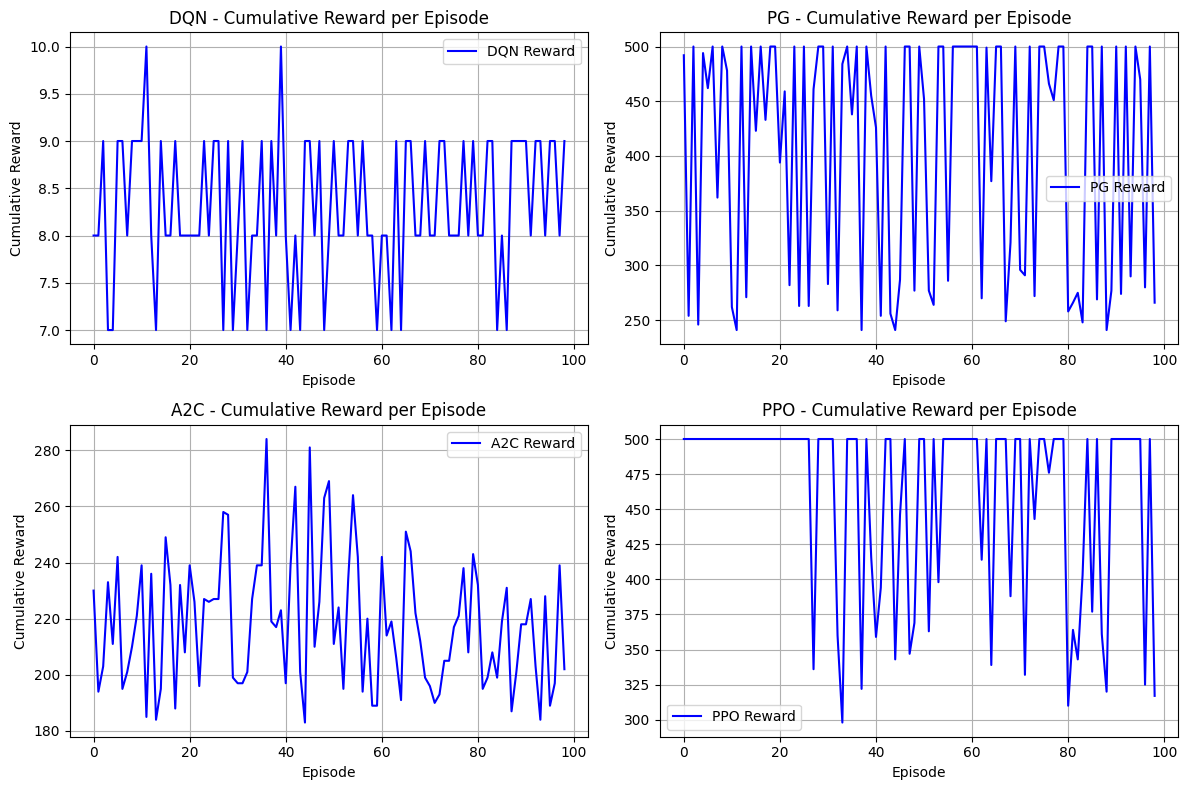

In [7]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  


model_names = ["DQN", "PG", "A2C", "PPO"]
ax_positions = [(0, 0), (0, 1), (1, 0), (1, 1)]  


for i, name in enumerate(model_names):
    ax = axes[ax_positions[i]]  
    ax.plot(sum_episode_scores[name], label=f"{name} Reward", color="b")
    ax.set_title(f"{name} - Cumulative Reward per Episode")
    ax.set_xlabel("Episode")
    ax.set_ylabel("Cumulative Reward")
    ax.legend()
    ax.grid(True)


plt.tight_layout()
plt.show()

## Chapter 5.1. Task 2 Extended (Hyperparametering DQN)

In this section, we fine-tune DQN’s hyperparameters to improve its performance on the CartPole-v1 environment. Previously, DQN struggled compared to PPO and A2C, so we adjust key settings to enhance learning stability and efficiency.

To ensure smoother training, we lower the learning rate and use a large replay buffer (100,000) to store past experiences. The model waits until 10,000 interactions before training, allowing it to learn from a diverse dataset. We also increase the batch size to 64 for better weight updates and update the target network every 1,000 steps to improve stability. The discount factor (gamma = 0.99) encourages long-term rewards, and the ε-greedy exploration strategy starts fully random but gradually reduces exploration over time, helping the model transition to more optimal actions.

After training for 200,000 timesteps, we evaluate the improved DQN model over 100 episodes by tracking its cumulative rewards. The agent runs each episode until it either reaches a maximum of 500 steps or violates the cart’s positional or angular limits. We print results every 10 episodes and calculate the final average score to check if the improvements helped DQN achieve an average reward above 195. This tuning process helps DQN perform closer to PPO and A2C, making it a stronger reinforcement learning agent.

In [8]:
dqn_env = gym.make("CartPole-v1")

hyper_dqn_model = DQN(
    "MlpPolicy", env,
    learning_rate=0.0005,        # Lower learning rate for stable convergence
    buffer_size=100_000,         # Large replay buffer for better experience sampling
    learning_starts=10_000,      # Allow the agent to collect experiences before learning
    batch_size=64,               # Higher batch size for better updates
    tau=1.0,                     # Target network update rate
    gamma=0.99,                  # Higher discount factor for long-term rewards
    train_freq=4,                # Update every 4 steps
    target_update_interval=1000,  # Update target network less frequently
    exploration_initial_eps=1.0,  # Start fully random
    exploration_final_eps=0.01,   # End with very low randomness
    exploration_fraction=0.1,     # Reduce randomness over first 10% of training
    verbose=1                     # Print training logs
)
hyper_dqn_model.learn(total_timesteps=200000)

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 24       |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 14000    |
|    time_elapsed     | 0        |
|    total_timesteps  | 140      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11999    |
|    time_elapsed     | 0        |
|    total_timesteps  | 180      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 18.8     |
|    exploration_rate | 0.987    |
| time/               |          |
|  

In [9]:
episode_scores = []

for episode in range(1, 100):  
    score = 0
    obs, _ = dqn_env.reset()  
    done = False
    state = 0

    while True:
        action = hyper_dqn_model.predict(obs, deterministic=True)[0]  
        n_state, reward, terminated, truncated, info = dqn_env.step(action)  
        done = terminated or truncated

        if abs(n_state[0]) > 2.4 or abs(n_state[2]) > 0.209:
            break
        if state == 500 or done:
            break

        obs = n_state
        score += reward
        state += 1

    episode_scores.append(score)
    if episode % 10 == 0:
        print(f"Episode: {episode}; Score: {score}")

avg_score = sum(episode_scores) / len(episode_scores)
print("Average score is ", avg_score)
print(f"Did the agent reach 195? {'Yes' if avg_score >= 195 else 'No'}")
dqn_env.close()


Episode: 10; Score: 499.0
Episode: 20; Score: 499.0
Episode: 30; Score: 499.0
Episode: 40; Score: 499.0
Episode: 50; Score: 499.0
Episode: 60; Score: 499.0
Episode: 70; Score: 499.0
Episode: 80; Score: 499.0
Episode: 90; Score: 499.0
Average score is  499.0
Did the agent reach 195? Yes


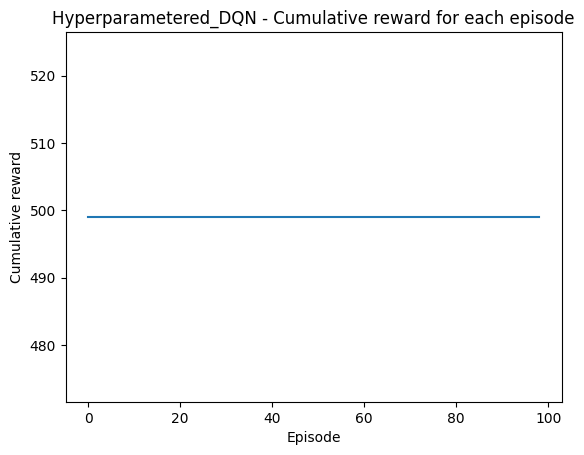

In [10]:
plt.plot(episode_scores)
plt.title("Hyperparametered_DQN - Cumulative reward for each episode")
plt.ylabel("Cumulative reward")
plt.xlabel("Episode")
plt.show()

# Chapter 6. Task 3 (One Episode)





In [11]:
!pip install moviepy

!pip install pygame


In [12]:
import os
import base64
import gym
from IPython.display import HTML, display, clear_output
from gym.wrappers import RecordVideo


video_dir = os.path.join(os.getcwd(), "video")
os.makedirs(video_dir, exist_ok=True)


def show_videos(video_dir):
    clear_output(wait=True)
    video_files = sorted([
        os.path.join(root, f)
        for root, _, files in os.walk(video_dir)
        for f in files if f.endswith(".mp4")
    ])

    if len(video_files) == 0:
        print("No videos found. Try running more episodes.")
        return

    html = ""
    for video_path in video_files:
        with open(video_path, "rb") as video_file:
            video_data = video_file.read()
        encoded_video = base64.b64encode(video_data).decode("ascii")
        html += f'''
            <h4>{video_path}</h4>
            <video width="400" height="300" controls>
                <source src="data:video/mp4;base64,{encoded_video}" type="video/mp4">
            </video>
            <br>
        '''

    display(HTML(html))


for name, model in models.items():
    print(f"\n=== Recording video for {name} ===")

    model_video_dir = os.path.join(video_dir, name)
    os.makedirs(model_video_dir, exist_ok=True)

    env = gym.make("CartPole-v1", render_mode="rgb_array")  
    env = RecordVideo(env, model_video_dir, episode_trigger=lambda e: True)

    observation, _ = env.reset()
    done = False
    state = 0

    while not done and state < 500:
        action, _ = model.predict(observation, deterministic=True)
        observation, reward, terminated, truncated, info = env.step(int(action))
        done = terminated or truncated
        state += 1

    env.close()


print("\n=== Recording video for Hyperparametered_DQN ===")

model_video_dir = os.path.join(video_dir, "Hyperparametered_DQN")
os.makedirs(model_video_dir, exist_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")  
env = RecordVideo(env, model_video_dir, episode_trigger=lambda e: True)

observation, _ = env.reset()
done = False
state = 0

while not done and state < 500:
    action, _ = hyper_dqn_model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(int(action))
    done = terminated or truncated
    state += 1

env.close()


print("\nChecking all recorded video files...")
for root, _, files in os.walk(video_dir):
    for f in files:
        print(" -", os.path.join(root, f))


show_videos(video_dir)


In [13]:
import shutil


shutil.rmtree("./video")


print("✅ 'video/' folder deleted successfully.")

✅ 'video/' folder deleted successfully.


# Chapter 7: Comparison of all the models





Chapter 7: Introduction to Comparison Metrics to evaluate the models and conclude which is better.

We want to compare all the models not only based on the tasks given which is the cumulative average reward per episode of the 5 models. We also take a look at 4 other metrics
1. Standard Deviation of Rewards
  Standard Deviation measures consistency. A model with high average reward but high variance may be less reliable.
2. Success Rate (Reward >= 195)
  Success rate measures how often the model completes the episode without failure. Meaning during evaluation/test phase, the agent is able to last full 195 timesteps without failing
3. Time to convergence (First episode score >= 195)
  Time to convergence measures trainig efficiency - how quickly the model reaches stable high rewards (e.g., >195). Count the episodes until reward stabilizes at leas 195.

4. Policy Entropy (PG, A2C, PPO only)

  Policy Entropy measures how "exploratory" the policy is. High entropy = random, Low entropy = deterministic.

## Chapter 7.1 : Comparison of all models based on average cumulative reward per episode

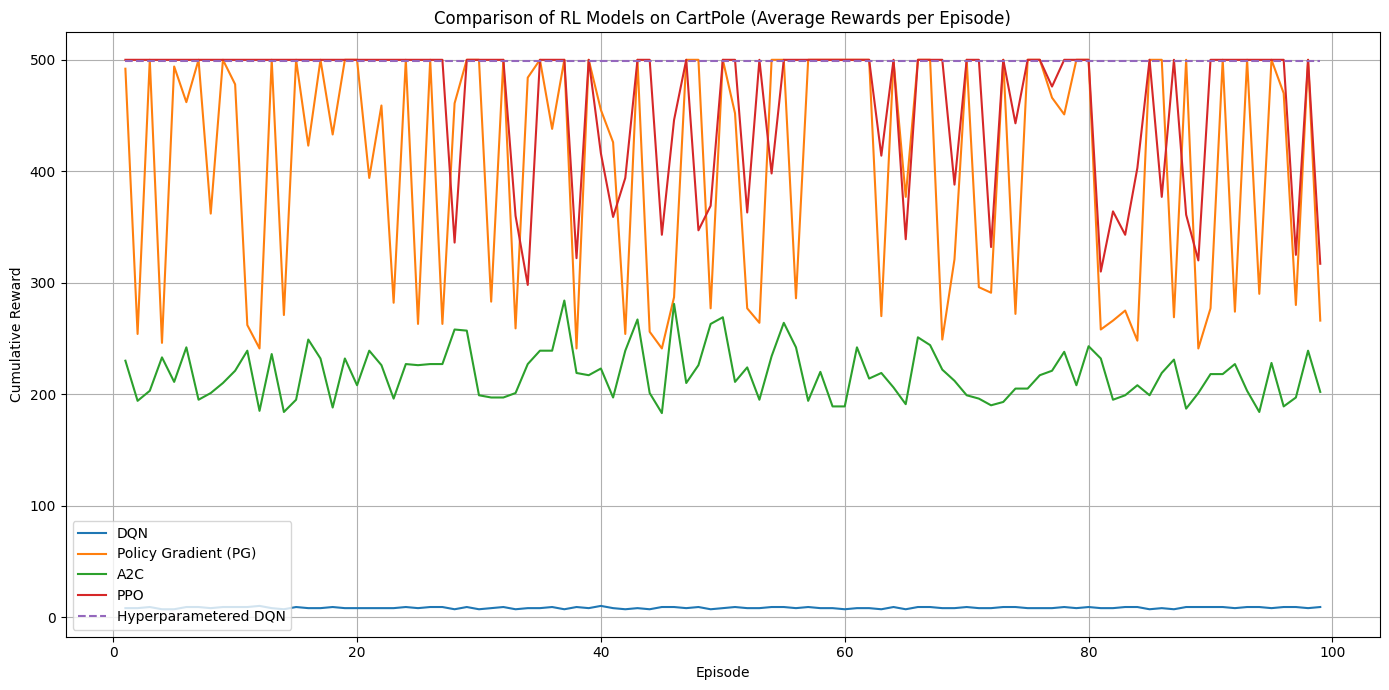

Average Reward Over 99 Episodes:
  • DQN: 8.30 No
  • PG: 405.31 Yes
  • A2C: 218.21 Yes
  • PPO: 462.25 Yes
  • Hyperparametered_DQN: 499.00 Yes


In [14]:


import matplotlib.pyplot as plt
import pandas as pd


episode_range = list(range(1, 100))  


df = pd.DataFrame({
    "Episode": episode_range,
    "DQN": sum_episode_scores["DQN"],
    "PG": sum_episode_scores["PG"],
    "A2C": sum_episode_scores["A2C"],
    "PPO": sum_episode_scores["PPO"],
    "Hyperparametered_DQN": episode_scores
})


plt.figure(figsize=(14, 7))
plt.plot(df["Episode"], df["DQN"], label="DQN")
plt.plot(df["Episode"], df["PG"], label="Policy Gradient (PG)")
plt.plot(df["Episode"], df["A2C"], label="A2C")
plt.plot(df["Episode"], df["PPO"], label="PPO")
plt.plot(df["Episode"], df["Hyperparametered_DQN"], label="Hyperparametered DQN", linestyle='--')
plt.title("Comparison of RL Models on CartPole (Average Rewards per Episode)")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Average Reward Over 99 Episodes:")
for model in ["DQN", "PG", "A2C", "PPO", "Hyperparametered_DQN"]:
    avg = df[model].mean()
    print(f"  • {model}: {avg:.2f} {'Yes' if avg >= 195 else 'No'}")


## Chapter 7.1 : Comparison of all models based on average cumulative reward per episode
Average Reward Comparison

Discussion: When measuring the results for average reward over 99 episode to whether it reaches >= 195,

*   DQN score is mostly <195, so it failed completely and didn't learn. This aligns with expectation as DQN without tuning struggles on CartPole without proper hyperparameters or experience replay tuning.
*   PG, PPO, hyperparametered_DQN performed very well
*   PG  is slightly lower than PPO but still stable for on-policy learning.
*   A2C show some stability for on-policy learning
*   All policy-gradient-based methods (PG,A2C, PPO) is good at solving CartPole, showing their robustness in continuous environment.

In conclusion: DQN only works better when performed with hyperparameter tuning. Policy gradient baesd methods may be better than q-value without fine tuning.



## Chapter 7.2 : Comparison of all models based on standard deviation of rewards

In [15]:
###Standard Deviation of rewards


import numpy as np

print("Standard Deviation of Rewards Over 99 Episodes:")
for model in ["DQN", "PG", "A2C", "PPO"]:
    std = np.std(sum_episode_scores[model])
    print(f"  • {model}: {std:.2f}")

std_hyper = np.std(episode_scores)
print(f"  • Hyperparametered_DQN: {std_hyper:.2f}")


Standard Deviation of Rewards Over 99 Episodes:
  • DQN: 0.74
  • PG: 107.30
  • A2C: 23.08
  • PPO: 64.43
  • Hyperparametered_DQN: 0.00


## Chapter 7.2 : Comparison of all models based on standard deviation of rewards

Discussion: When measuring the results for average reward over 99 episode to determine the performance consistency across episodes. A model with high average reward but high variance may be less reliable

*   Hyperparametered_DQN is the most consistent model, with zero variance. This indicate the model has fully deterministic and optimal policy for CartPole. And since the model with highest average reward of 499 and least variance, it is the most reliable out of the models

*   DQN also show low variance of close to 0 std but it is due to the LEAST average reward of less than 8.3 so it is still a bad sign if it is not tune with hyperparameters.

*   PG, 107.30 std dev and 405.31 reward score, while have high average reward, it also has higher variance, STD DEV than PPO, indicating that the model is more episodic instability or ongoing exploration. This shows PG are less reliable when compared to PPO with lower std dev of 64.43 and 462.25 reward score.

In conclusion: Hyperparametered_DQN is the most reliable and highest reward score which is desirable in safety-critical or real-world tasks where predictability is important in uncertain environment. As DQN is also consistent and reliable but does not perform in reward score, it reinforces the idea that hyperparameter tuning in Hyperparametered_DQN is important, especially for value-based methods like DQN.

Therefore, in real-world deployment (e.g. robotics, finance) a stable model like hyperparamtered_DQN is preferable over a volatile but high-performing model like PPO.

For the discussion of Policy-gradient-based methods (A2C, PG, PPO) about whether the model is episodic instability (unstable policy) or ongoing exploration, we have to evaluate with Policy Entropy in Chapter 7.5 below.



## Chapter 7.3 : Comparison of all models based on success rate (Reward >= 195)

Success Rate (Episode Score >= 195):
  • DQN: 0.00%
  • PG: 100.00%
  • A2C: 85.86%
  • PPO: 100.00%
  • Hyperparametered_DQN: 100.00%


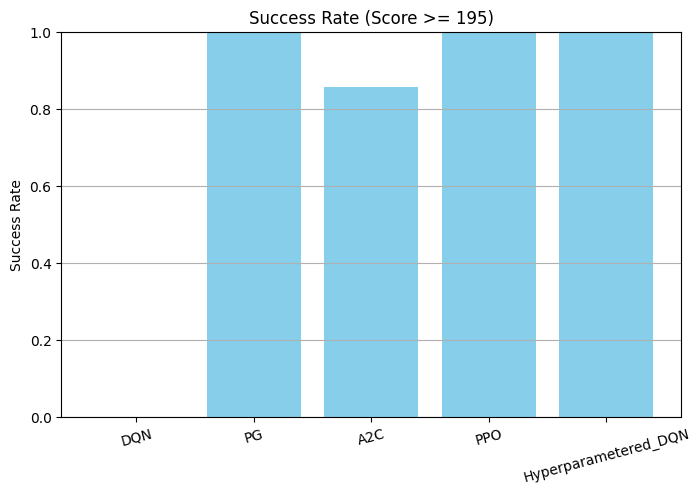

In [16]:
###Success Rate (Reward >= 195)


import matplotlib.pyplot as plt

success_rates = {}
for model in ["DQN", "PG", "A2C", "PPO"]:
    rewards = sum_episode_scores[model]
    success_count = sum([score >= 195 for score in rewards])
    success_rate = success_count / len(rewards)
    success_rates[model] = success_rate


hyper_success = sum([score >= 195 for score in episode_scores]) / len(episode_scores)
success_rates["Hyperparametered_DQN"] = hyper_success


print("Success Rate (Episode Score >= 195):")
for model, rate in success_rates.items():
    print(f"  • {model}: {rate * 100:.2f}%")


plt.figure(figsize=(8, 5))
plt.bar(success_rates.keys(), success_rates.values(), color='skyblue')
plt.ylim(0, 1.0)
plt.ylabel("Success Rate")
plt.title("Success Rate (Score >= 195)")
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()





## Chapter 7.3 : Comparison of all models based on success rate (episode score >= 195)

Discussion: When measuring the results for success rate comparing how each model succeeded in completing the CartPole task based on the benchmark of a reward >= 195.

*   DQN shows a success rate of 0%, which confirms the need for better hyperparameter tuning or experience replay configuration in base model.

*   PG, PPO and hyperparametered DQN all reached 100% success rate, means the models have learned stable policies that is able to predict the pole balance at uncertain condition.

*   A2C has success rate of 85.56% meaning there maybe due to some uncertainty or a bit of change in environment that causes it to be less than 100%. Since we do not set the seed for consistent environment, it is expected for models to not perform 100% reward score.


In Conlusion:  Success Rate = Robustness, which since PG, PPO, Hyperparametered_DQN has near 100% success rate, the model can handle variations in initial states and still perform optimally. Which is crucial for stochastic environment.



## Chapter 7.4 : Comparison of all models based on Time to Convergence (First episode score >= 195)

In [17]:


print("Time to Convergence (First Episode with Reward ≥ 195):")
for model in ["DQN", "PG", "A2C", "PPO"]:
    rewards = sum_episode_scores[model]
    try:
        episode_index = next(i for i, r in enumerate(rewards) if r >= 195)
        print(f"  • {model}: Episode {episode_index + 1}")
    except StopIteration:
        print(f"  • {model}: Did not converge")

try:
    hyper_index = next(i for i, r in enumerate(episode_scores) if r >= 195)
    print(f"  • Hyperparametered_DQN: Episode {hyper_index + 1}")
except StopIteration:
    print("  • Hyperparametered_DQN: Did not converge")


Time to Convergence (First Episode with Reward ≥ 195):
  • DQN: Did not converge
  • PG: Episode 1
  • A2C: Episode 1
  • PPO: Episode 1
  • Hyperparametered_DQN: Episode 1


## Chapter 7.4 : Comparison of all models based on time to convergence (First Episode with Reward >= 195)

Discussion: When measuring the Time to Convergence, it evaluate how quickly each model learns an effective policy. This results show that all model except DQN (non-policy-gradient-based model) converged by the very first episode, which is very impressive.

*   The models except DQN, converged by the first episode indicates that the learning rate is effective during training and generalized well.

*   DQN did not converge at all, which aligns with its least (less than 10) average reward, and 0% success rate (reward score >=195).

In Conlusion:  Fast Convergece means better generalisation from diverse model training. The models except DQN is desirable in real-world applications where online adaptation is limited or costly. Furthermore, this conclude that DQN requires hyperparameter tuning as it struggle in simple environment without sufficient exploration or experience replay configuration. Thus, for DQN as how we built Hyperparametered_DQN with lower learning rate, and larger buffer size is important.

Below is as described from above how we fine tune the Hyperparametered_DQN to achieve best results in uncertain environment without setting the seed.:
To ensure smoother training, we lower the learning rate and use a large replay buffer (100,000) to store past experiences. The model waits until 10,000 interactions before training, allowing it to learn from a diverse dataset. We also increase the batch size to 64 for better weight updates and update the target network every 1,000 steps to improve stability. The discount factor (gamma = 0.99) encourages long-term rewards, and the ε-greedy exploration strategy starts fully random but gradually reduces exploration over time, helping the model transition to more optimal actions.



## Chapter 7.5 : Comparison of all models based on policy Entropy (PG, A2C, PPO)

In [678]:
### Policy Entropy (PG, A2C, PPO)

# Entropy is a measure of randomness in the policy — only for stochastic policies like PG, A2C, PPO

import torch
import gym

print("Policy Entropy (Exploration Measure) for PG, A2C, PPO:")


sample_env = gym.make("CartPole-v1")
obs = [sample_env.observation_space.sample() for _ in range(100)]
obs_tensor = torch.tensor(obs, dtype=torch.float32)

for model_name in ["PG", "A2C", "PPO"]:
    model = models[model_name]

    dist = model.policy.get_distribution(obs_tensor)
    entropy = dist.entropy().mean().item()

    print(f"  • {model_name}: Entropy = {entropy:.4f}")




Policy Entropy (Exploration Measure) for PG, A2C, PPO:
  • PG: Entropy = 0.4711
  • A2C: Entropy = 0.0504
  • PPO: Entropy = 0.5322


## Chapter 7.5 : Comparison of all models based on polic entropy for policy-based model (PG, A2C, PPO)

from the discussion in Chapter 7.2 : Comparison of all models based on standard deviation of rewards

*   PG and PPO, while have high average reward, slightly more than A2C, it also has higher variance (st dev) than A2C, indicating that the models are more episodic instability or ongoing exploration. This shows both model are less reliable when compared to A2C.

For the discussion of Policy-gradient-based methods (A2C, PG, PPO) about whether the model is episodic instability (unstable policy) or ongoing exploration, we have to evaluate with Policy Entropy in Chapter 7.5 below.


*   PPO and PG has the highest policy entropy, indicating that the model still samples from a diverse set of actions. This is common as both PPO and PG function encourages safe exploration to improve.

*   A2C shows very low entropy, suggesting it has become highly confident and determistics when model training. It is likely that when exploring, it has already converge to a stable policy and no longer needs to explore and learn better.

In Conclusion: Low entropy (A2C) suggests a stable policy, ideal for tasks where reliability is important while High entropy (PPO and PG) implies more exploration which may help in generalisation but may have variance, higher Standard deviation in result.
This aligns Standard deviation in rewards higher means higher entropy for both PPO, st dev of 64.43, and PG, st dev of 107.30, , while A2C has lower reward variance, st dev 23.08, which aligns low entropy. This confirms that more exploratory policies (PPO and PG) tend to yield  more variable performance, especially when not converge early like A2C.

Despite higher entropy, PPO and PG still achieved near or full success rate, showing that exploration policy does not hurt the results in performance, in fact it may help with policy-based model which require learning and reduce the likelihood of overfitting.

Additionally, for A2C with low entropy it shows decisive and do not require further exploration, which may also suggest potential overfitting, meaning if the environment changed slightly, with A2C policy it might not adapt well and learn and predict meaningful results.


High entropy encourages exploration and prevents the model from overfitting by focusing excessively on specific data points.[1]


# Chapter 8: Conclusion of all the models


After comparing based on the above metrics we test for each of the model we have come to afew conclusion.

1. Average Reward: DQN fails unless hyperparameted tuned. All policy -gradient models and hyperparametered DQN model solve the task. PPO and PG are slightly stronger than A2C in average score. Hyperparametered_DQN performs the best in average score

2. Standard Deviation (Consistency and Variance) : PPO and PG are more exploratory and give varied results. A2C with low entropy it shows decisive and do not require further exploration.Hyperparametered_DQN is the best in 0 st dev, means no variance and very reliable.

3. Success Rate (Score >= 195): All models except DQN are robust and handle variations in testing well. A2C achieve 85.86% which perform well.

4. Time to convergence: Policy gradient models and Hyperparamented_DQN converge quickly at first episode, DQN did not converge to the minimum reward score without tuning.

5. Policy Entropy (Exploration Behavior): High entropy models, PPO and PG are more generalisable and adaptive, has higher standard deviation in variance. A2C is more stable but face potential overfit in new environment.

Overall; Hyperparametered DQN is the best overall model - perfect reward, consistent, robuts, and stable. However it can only perform well with proper tuning unlike the base model DQN.
Both PPO and PG are excellent in performance and exploration, but also has more variability in standard deviation, good for complex tasks that require adaptability.
Base DQN should be avoided without tuning, as it consistently underperforms in CartPole environment.

#References

[1] J. Bowie, A. Goyal  "Discover the Role of Entropy in Machine Learning", PicklAi Blog, Jan. 3, 2025.
https://www.pickl.ai/blog/entropy-in-machine-learning/

# Chapter 9: Bonus (Train Neural Network Policy Keras sequential model using REINFORCE- Polivy Gradient 

References:
https://link.springer.com/article/10.1007/BF00992696

Reinforcement Learning Agent for Cartpole using Neural Network Policy with Policy Gradient Method PG-Manual , The previous was Policy Gradient Reinforce using PPO


Motivation to implement Neural Network policy with Policy Gradient
1. 
In traditional reinforcement learninig tasks, such as the CartPole problem original, common agent like Q-learning is use with discrete state-action representation. However, the environment of CartPole has a continuous state space (like pole angle, velocity), which is difficult to discretize efficiently. To over come the limitations of discretization and generalise better to unseen state, neural network can be use as policy approximator.

Additionally REINFORCE PG is the most basic policy gradient algorithm to learn the foundation of how policy gradient works.
By building from scratch and developing using Keras/tensorflow, gives full control and transparency of sampling actions manually while computing gradients via tf.Gradient Tape and applying discounted rewards manually and update weights.


I try to implement neural network policy using Policy Gradient (PG) method because CartPole environment is continuous state space, and  tabular methods like Q-Learning don't generalise well in such environment. As PG leaern a stochastic policy directly using gradient ascent, and implementing neural network helps to provide the flexibility to approximate the policy effectively. This combination of 2 methods can be test on tackling complex environment like CartPole.

The ode lets us learn:
How reward signals affect learning, how gradient shape the policy, and how stochastic policies behave.

In [19]:
!pip install tensorflow


In [20]:
#Install dependencies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import gymnasium as gym

In [21]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

obs, _ = env.reset()  # Newer Gym versions return (obs, info)


In [22]:
print(tf.__version__)


2.19.0


## Develop Neural Network Model using keras, we name it as modelNNPGR


Building the policy network for REINFORCE algorithm that :
1. Takes the CartPole state (position, velocity, angle, angular velocity) so 4 inputs
2. Takes the input and passes through 2 hidden layer (exponential linear unit, elu) with non-linear function as activations.
3. Outputs a probability of choosing action 0 (left) via a sigmoid function
4. Uses binary cross-entropy to measure how far the model's output is from the "target" action
By combining REINFORCE's simplicity with neural networkk deeep learning, the model learns a complex, non-linear policy from raw inpus (the 4 state of CartPole which are continuous), the model can gain more expressive decision-making without needing advanced actor critic methods. It is a better stepping stone towards scalable PG algorithms like A2C and PPO. Instead of directly implementing PPO or PG we can understand the inner mechanism of neural network that shape the PG algorithm like A2C and PPO.

In [23]:
n_inputs = 4
modelNNPGR = keras.models.Sequential([
    keras.layers.Dense(16, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(16, activation="elu"),
    keras.layers.Dense(1, activation="sigmoid")
])

C:\Users\Fengren\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Define the loss function (Binary crossentropy for binary action decision)
loss_fn = keras.losses.binary_crossentropy

## Play One Step


We implement the policy gradient-Reinforce into the neural network policy, that is the gradient-based learning from action decisions. Essentially the code of forward + backward pass manually computes the gradient of the policy loss in a single step. 
The core policy gradient step include:
1. Computes the probability of taking an action (left/right), from sigmoid output with probability of 0-1 as binary actions (left/right).
2. Samples an action stochastically (Bernoulli-style)
3. Computes the loss how 'wrong' the action based on the environment and model action
4. Uses tf.gradienttape() to record operations and calculate gradient w.r.t model parameters (neural network weights) .
5. The gradients help to nudge/adjust the weights to make better decision over time.

In [25]:
def play_one_step(env, obs, modelNNPGR, loss_fn): 
    with tf.GradientTape() as tape:
         left_proba = modelNNPGR(obs[np.newaxis])
         action = (tf.random.uniform([1, 1]) > left_proba)
         y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
         loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, modelNNPGR.trainable_variables)
    obs, reward, done, terminated,info = env.step(int(action[0, 0].numpy())) 
    return obs, reward, done, grads


In [26]:
np.newaxis
print(obs.shape)
print(obs[np.newaxis].shape)

(4,)
(1, 4)


In [27]:
# Forward + backward pass
with tf.GradientTape() as tape:
    obs = np.array(obs)

    # Ensure correct input shape: (1, 4)
    if obs.ndim == 1 and obs.shape[0] == 4:
        obs = obs[np.newaxis, :]  # (1, 4)

    # Forward pass through the modelNNPGR
    left_proba = modelNNPGR(obs)
    print(f"left_proba: {left_proba}")

    # Sample action based on left_proba
    action = (tf.random.uniform([1, 1]) > left_proba)
    print(f"action: {action}")

    # Calculate target and loss
    y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
    print(f"y_target: {y_target}")

    loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    print(f"loss: {loss}")

# Backward pass
grads = tape.gradient(loss, modelNNPGR.trainable_variables)
print("Gradients:")
for g in grads:
    print(g)

left_proba: [[0.5128977]]
action: [[False]]
y_target: [[1.]]
loss: 0.6676788330078125
Gradients:
tf.Tensor(
[[ 1.27765033e-02 -8.41287803e-03 -6.12120377e-03 -1.39410645e-02
  -1.77859496e-02 -2.67623411e-03  7.72025762e-03 -9.67555027e-03
   1.22025618e-02 -1.99160650e-02 -1.61269878e-03 -9.19585302e-03
  -3.93206161e-03 -7.50611676e-03  1.34690758e-02  1.16824759e-02]
 [ 2.14113691e-03 -1.40986312e-03 -1.02581538e-03 -2.33629835e-03
  -2.98063946e-03 -4.48493840e-04  1.29379111e-03 -1.62146683e-03
   2.04495341e-03 -3.33761284e-03 -2.70262419e-04 -1.54107728e-03
  -6.58950361e-04 -1.25790457e-03  2.25720089e-03  1.95779535e-03]
 [ 5.43829374e-05 -3.58092475e-05 -2.60547822e-05 -5.93398654e-05
  -7.57055459e-05 -1.13913375e-05  3.28611241e-05 -4.11837900e-05
   5.19399618e-05 -8.47723422e-05 -6.86442081e-06 -3.91419671e-05
  -1.67367416e-05 -3.19496394e-05  5.73308571e-05  4.97262299e-05]
 [ 2.75880122e-03 -1.81657332e-03 -1.32173742e-03 -3.01026204e-03
  -3.84047930e-03 -5.77873085e-

In [28]:
# Prepare the observation
obs = np.array(obs, dtype=np.float32)


In [29]:
# Reshape only if needed
if obs.ndim == 1:
    obs = obs.reshape(1, -1)  # shape becomes (1, 4)

In [30]:
# Compute gradient using GradientTape
with tf.GradientTape() as tape:
    left_proba = modelNNPGR(obs)  # shape (1, 1)
    print(f"left_proba: {left_proba.numpy()}")

    action = tf.random.uniform([1, 1]) > left_proba
    print(f"action: {action.numpy()}")

    y_target = tf.constant([[1.]], dtype=tf.float32) - tf.cast(action, tf.float32)
    print(f"y_target: {y_target.numpy()}")

    loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    print(f"loss: {loss.numpy()}")

# Compute gradients
grads = tape.gradient(loss, modelNNPGR.trainable_variables)
print("Gradients:")
for g in grads:
    print(g.numpy())

left_proba: [[0.5128977]]
action: [[False]]
y_target: [[1.]]
loss: 0.6676788330078125
Gradients:
[[ 1.27765033e-02 -8.41287803e-03 -6.12120377e-03 -1.39410645e-02
  -1.77859496e-02 -2.67623411e-03  7.72025762e-03 -9.67555027e-03
   1.22025618e-02 -1.99160650e-02 -1.61269878e-03 -9.19585302e-03
  -3.93206161e-03 -7.50611676e-03  1.34690758e-02  1.16824759e-02]
 [ 2.14113691e-03 -1.40986312e-03 -1.02581538e-03 -2.33629835e-03
  -2.98063946e-03 -4.48493840e-04  1.29379111e-03 -1.62146683e-03
   2.04495341e-03 -3.33761284e-03 -2.70262419e-04 -1.54107728e-03
  -6.58950361e-04 -1.25790457e-03  2.25720089e-03  1.95779535e-03]
 [ 5.43829374e-05 -3.58092475e-05 -2.60547822e-05 -5.93398654e-05
  -7.57055459e-05 -1.13913375e-05  3.28611241e-05 -4.11837900e-05
   5.19399618e-05 -8.47723422e-05 -6.86442081e-06 -3.91419671e-05
  -1.67367416e-05 -3.19496394e-05  5.73308571e-05  4.97262299e-05]
 [ 2.75880122e-03 -1.81657332e-03 -1.32173742e-03 -3.01026204e-03
  -3.84047930e-03 -5.77873085e-04  1.66701

In [31]:
modelNNPGR.trainable_variables


[<Variable path=sequential/dense/kernel, shape=(4, 16), dtype=float32, value=[[-0.30271637  0.01798135 -0.02662855 -0.09719414  0.54406846 -0.4611495
    0.2519139   0.00513273  0.00596589  0.34411722  0.06621975  0.44085783
   -0.06205899  0.40343046  0.00145644  0.08313823]
  [ 0.1629529  -0.13791344  0.37127298  0.38562006 -0.10892659  0.45540917
   -0.4226063   0.37591577 -0.40904522  0.38890523  0.48622525 -0.0940035
    0.3116936  -0.06000352  0.24132562 -0.19956017]
  [ 0.09493601  0.2877316   0.25602323 -0.14468595  0.27436745  0.5235729
    0.18911892  0.23583913  0.013322    0.50200903  0.51381457  0.08893251
   -0.41538924 -0.42008412 -0.34727535 -0.35937935]
  [-0.3866791   0.46123314 -0.22819415 -0.32785532  0.21289885 -0.01028293
   -0.20221147  0.4562558   0.3336069  -0.06630555 -0.08256051 -0.44379863
    0.5115714  -0.49347886  0.16488796  0.3428265 ]]>,
 <Variable path=sequential/dense/bias, shape=(16,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## Play multiple episodes

We construct play_multiple_episodes as a crucial part to implement REINFORCE with neural network model, as it plays a central role in batching experience before applying policy updates. 
1. Simuate multipple episodes and in each episode:
   a. record rewards at every step
   b. compute and store gradient of the model at each step (via play_one_step)
Essentially, the steps are:
1. Collecting a batch of episodes
2. Computing gradients
3. Weighting those gradients using returns
4. Applying a policy update

This batch update method REINFORCE, is more stable than updating after every episode, and has less variance in learning signal which the results below show 0 std dev for this Neural Network with Policy Gradient-REINFORCE

In [32]:
def play_multiple_episodes(env, n_episodes, n_max_steps, modelNNPGR, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()[0]
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env,obs,modelNNPGR,loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

In [33]:
env = gym.make("CartPole-v1")
n_episodes=10
n_max_steps=500
loss_fn = keras.losses.binary_crossentropy

all_rewards, all_grads = play_multiple_episodes(env,n_episodes,n_max_steps,modelNNPGR,loss_fn)

len(all_grads[0])

30

In [34]:
len(all_rewards[0])


30

In [35]:
print(len(all_grads[0]))
all_grads[0]

30


[[<tf.Tensor: shape=(4, 16), dtype=float32, numpy=
  array([[-0.01116889,  0.00751307,  0.00522117,  0.01194791,  0.01635191,
           0.00228993, -0.00687535,  0.0086718 , -0.0109871 ,  0.0181242 ,
           0.00146958,  0.00858557,  0.0036706 ,  0.00681344, -0.01199076,
          -0.01056906],
         [ 0.00616252, -0.0041454 , -0.00288082, -0.00659235, -0.00902229,
          -0.00126349,  0.00379353, -0.00478473,  0.00606222, -0.01000017,
          -0.00081085, -0.00473716, -0.00202528, -0.00375937,  0.00661599,
           0.00583156],
         [-0.00346667,  0.00233196,  0.00162058,  0.00370847,  0.00507541,
           0.00071076, -0.00213402,  0.00269161, -0.00341025,  0.00562551,
           0.00045614,  0.00266484,  0.00113931,  0.0021148 , -0.00372177,
          -0.00328049],
         [-0.01247428,  0.00839118,  0.0058314 ,  0.01334435,  0.01826307,
           0.00255757, -0.00767892,  0.00968533, -0.01227124,  0.0202425 ,
           0.00164134,  0.00958902,  0.00409961,  0.

## Discounted Rewards (Action return and Action advantage)

We want to compute the returns and advantages used in REINFORCE update.

For action return, it computes the cumulative future reward using a discount factor , γ gamma, and it outputs how good each action taken was in the long run, not just immediately. 

It is useful for encouraging long-term planning instead of greedy short-term rewards taken into consideration.
This is the core return signal in REINFORCE and most PG algorithms.




For action advantage, after computing discounted rewards for each episode:
1. It normalizes the rewards in the formula where

μ = mean return over all episodes and timesteps
σ = standard deviation

2. Implementing normalisation helps in:
    a. Reducing variance in the policy gradient estimates
   b. Keeps updates stable by centering gradients around 0
   c. Makes learning faster and more consistent.

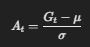

In [36]:
#Action Return
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

#Action Advantage
def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]
    
                    

In [37]:
for index,step in enumerate(range(len(all_rewards[0]) - 2, -1, -1)):
    print(index,step)

0 28
1 27
2 26
3 25
4 24
5 23
6 22
7 21
8 20
9 19
10 18
11 17
12 16
13 15
14 14
15 13
16 12
17 11
18 10
19 9
20 8
21 7
22 6
23 5
24 4
25 3
26 2
27 1
28 0


In [38]:
discount_rewards(all_rewards[0],0.95)


array([15.70722472, 15.48128918, 15.24346229, 14.99311821, 14.72959811,
       14.45220854, 14.16021951, 13.85286265, 13.5293291 , 13.18876747,
       12.83028155, 12.45292795, 12.05571363, 11.6375933 , 11.19746663,
       10.7341754 , 10.24650042,  9.73315833,  9.19279825,  8.62399815,
        8.02526122,  7.39501181,  6.73159137,  6.03325408,  5.29816219,
        4.52438125,  3.709875  ,  2.8525    ,  1.95      ,  1.        ])

In [39]:
discount_and_normalize_rewards(all_rewards,0.95)


[array([ 1.6702745 ,  1.61998246,  1.56704346,  1.51131821,  1.45266005,
         1.39091461,  1.32591942,  1.25750342,  1.18548658,  1.10967939,
         1.02988234,  0.94588545,  0.85746766,  0.76439631,  0.66642647,
         0.56330032,  0.45474648,  0.34047928,  0.22019801,  0.09358616,
        -0.03968948, -0.17997963, -0.32765347, -0.48309962, -0.64672714,
        -0.81896664, -1.00027137, -1.19111846, -1.39201013, -1.60347505]),
 array([ 0.34047928,  0.22019801,  0.09358616, -0.03968948, -0.17997963,
        -0.32765347, -0.48309962, -0.64672714, -0.81896664, -1.00027137,
        -1.19111846, -1.39201013, -1.60347505]),
 array([ 1.02988234,  0.94588545,  0.85746766,  0.76439631,  0.66642647,
         0.56330032,  0.45474648,  0.34047928,  0.22019801,  0.09358616,
        -0.03968948, -0.17997963, -0.32765347, -0.48309962, -0.64672714,
        -0.81896664, -1.00027137, -1.19111846, -1.39201013, -1.60347505]),
 array([ 0.45474648,  0.34047928,  0.22019801,  0.09358616, -0.03968948

In [40]:
discount_rewards([10,0,-50],discount_factor=0.8)


array([-22, -40, -50])

In [41]:
discount_and_normalize_rewards([[10,0,-50],[10,20]],0.8)


[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

## Train with Neural Network model with Policy Gradient

Below we implement the training loop for REINFORCE Policy Gradient with Neural Network, which is a improve from original REINFORCE Algorithm

We train the model for 500 iterations, and in each iteration, we:
1. Run 10 episode
2. For each episode, collect gradients and rewards, to store how good each step was using reward
3. Compute discounted and normalized return (advantage) rewards to reduce variance, by convertin graw rewards into more stable, standardised signals. This improves learning by giving the gradient more meaningful magnitude and direction.
4. Apply policy gradient with advantage weighting in each iteration for loop of var_index:
   a. Multiply each gradient by its associated advantage (normalized discounted reward)
   b. Then average over all episodes to get the mean gradient per parameter
   c. Doing exactly based on REINFORCE algorithm
   


   
5. Apply updates to neural network using Adam optimizer, by doing computed gradient update to improve policy network. Additionally Adam optimizer is adaptive and faster than vanilla SGD
6. Print the mean total reward per batch to track how the model improve over time, in order to fine tune the neural network or training parameters 

In [42]:
n_iterations = 500
n_episodes_per_update = 10
n_max_steps = 500
gamma = 0.99
optimizer = keras.optimizers.Adam(learning_rate=0.005)
discount_factor= 0.95

In [43]:
loss_fn = keras.losses.binary_crossentropy
obs = env.reset()

In [44]:
obs[0][np.newaxis]


array([[-0.02706106,  0.00818598,  0.04842937, -0.02570681]],
      dtype=float32)

In [45]:
for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, modelNNPGR, loss_fn)
    all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_factor)
    
    all_mean_grads = []
    for var_index in range(len(modelNNPGR.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
             for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    
    optimizer.apply_gradients(zip(all_mean_grads, modelNNPGR.trainable_variables))
    
    mean_total_reward = np.mean([np.sum(rewards) for rewards in all_rewards])
    print(f"Iteration {iteration + 1}: mean reward = {mean_total_reward:.2f}")

Iteration 1: mean reward = 13.40
Iteration 2: mean reward = 27.20
Iteration 3: mean reward = 15.70
Iteration 4: mean reward = 19.60
Iteration 5: mean reward = 24.20
Iteration 6: mean reward = 19.90
Iteration 7: mean reward = 24.90
Iteration 8: mean reward = 17.60
Iteration 9: mean reward = 41.00
Iteration 10: mean reward = 32.20
Iteration 11: mean reward = 40.60
Iteration 12: mean reward = 54.20
Iteration 13: mean reward = 44.00
Iteration 14: mean reward = 34.30
Iteration 15: mean reward = 55.60
Iteration 16: mean reward = 59.00
Iteration 17: mean reward = 39.80
Iteration 18: mean reward = 82.80
Iteration 19: mean reward = 61.90
Iteration 20: mean reward = 99.10
Iteration 21: mean reward = 86.60
Iteration 22: mean reward = 88.00
Iteration 23: mean reward = 80.50
Iteration 24: mean reward = 114.80
Iteration 25: mean reward = 76.60
Iteration 26: mean reward = 116.30
Iteration 27: mean reward = 143.80
Iteration 28: mean reward = 132.50
Iteration 29: mean reward = 114.50
Iteration 30: mean

In [46]:
len(modelNNPGR.trainable_variables)


6

In [47]:
np.mean(all_final_rewards[0])


-9.094947017729283e-16

In [48]:
env.reset()[0]


array([ 0.01558876, -0.0470915 , -0.01550079, -0.03570028], dtype=float32)

In [49]:
obs=env.reset()[0]
obs

array([ 0.03323589, -0.00453953, -0.01366413, -0.03489719], dtype=float32)

# Chapter 10: Combining NeuralNetwork into Policy Gradient-Reinforce Result to the original Tasks

## Back to Task 1 (modelNNPGR Testing with NN and REINFORCE Policy Gradient)

In [674]:


observation = np.array(observation, dtype=np.float32)


left_proba = modelNNPGR.predict(observation.reshape(1, -1), verbose=0)


action = int(np.random.rand() > left_proba)


print("=== Vanilla REINFORCE with NN ===")
print("Observation space is: ")
print("Cart Position:    ", observation[0])
print("Cart Velocity:    ", observation[1])
print("Pole Angle:       ", observation[2])
print("Angular Velocity: ", observation[3])
print("Chosen action: ", action)
print("\n")


for name, model in models.items():
    observation, info = test_env.reset()
    print(f"=== {name} ===")
    print("Observation space is: ")
    print("Cart Position:    ", observation[0])
    print("Cart Velocity:    ", observation[1])
    print("Pole Angle:       ", observation[2])
    print("Angular Velocity: ", observation[3])
    action, _ = model.predict(observation)
    print("Chosen action: ", action)
    print("\n")


=== Vanilla REINFORCE with NN ===
Observation space is: 
Cart Position:     -0.023814406
Cart Velocity:     -0.018231748
Pole Angle:        0.039971896
Angular Velocity:  0.03962788
Chosen action:  1


=== DQN ===
Observation space is: 
Cart Position:     0.032721356
Cart Velocity:     0.044876322
Pole Angle:        0.043469675
Angular Velocity:  0.002586199
Chosen action:  1


=== PG ===
Observation space is: 
Cart Position:     0.044485174
Cart Velocity:     -0.04905251
Pole Angle:        -0.04881814
Angular Velocity:  -0.0041784006
Chosen action:  1


=== A2C ===
Observation space is: 
Cart Position:     -0.023243248
Cart Velocity:     0.019948123
Pole Angle:        0.009236844
Angular Velocity:  0.02021795
Chosen action:  1


=== PPO ===
Observation space is: 
Cart Position:     -0.030162582
Cart Velocity:     -0.023862684
Pole Angle:        0.046093
Angular Velocity:  -0.04739461
Chosen action:  1




C:\Users\Fengren\AppData\Local\Temp\ipykernel_18208\4025320670.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(np.random.rand() > left_proba)


Based on the output of first step decision of all the RL models, it coincidentally took action 1 (right) which is quite expected because the initial state is balanced, so both actions are nearly equal in expected return. The Vanilla REINFORCE with NN is stochastic since left probability might be low, but sampling the first randomly gives action 1, where as other models are deterministic at inference.

The Vanilla REINFORCE with NN model:
1. Improves over basic REINFORCE algorithms by:
   a. Using a neural network for generalisation
   b. Learning a differential policy
   c. Scaling to continuous spaces
2. But is still limited compared to DQN/A2C/PPO:
   a. No baseline for variance reduction
   b. No replay buffer or bootstrapping
   c. No clipped/regularized policy updates

The simple models is REINFORCE Algorithm, then REINFORCE with NN and more complex and commercial models are DQN, PG(PPO), A2X, PPO.

For Comparison of improvement over REINFORCE ALGORITHM and its strength:
1. DQN - improvement : off-policy, stable, strenth: best for discrete action value
2. PG(PPO) - improvement: on-policy, advantage + clipping, strength: Balanced exploration
3. A2C - improvement: Actor + Critic, strength: Stable Learning via baseline
4. PPO - improvement: Clipped updatees, trust-region-like , strength: Gold standard via baseline
5. REINFORCE with NN - improvement: more scalable than table-based, strength: limited

## Back to Task 2 (Average Score with NN and REINFORCE Policy Gradient with all the other models) 

C:\Users\Fengren\AppData\Local\Temp\ipykernel_18208\1063659709.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(np.random.rand() > left_proba)  # Stochastic policy


Episode: 10; Score: 500.0
Episode: 20; Score: 500.0
Episode: 30; Score: 500.0
Episode: 40; Score: 500.0
Episode: 50; Score: 500.0
Episode: 60; Score: 500.0
Episode: 70; Score: 500.0
Episode: 80; Score: 364.0
Episode: 90; Score: 500.0

Average score is 493.42424242424244
Did the agent reach 195? Yes


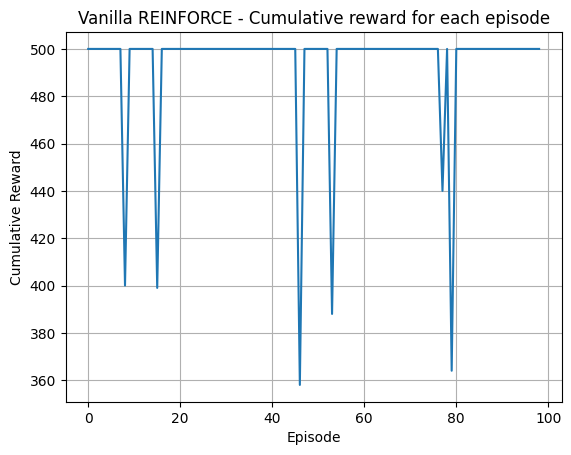

In [51]:
import gym
import numpy as np
import matplotlib.pyplot as plt

NNepisode_scores = []

for episode in range(1, 100):
    score = 0
    obs, _ = test_env.reset()
    done = False
    state = 0

    while not done and state < 500:
        obs = np.array(obs, dtype=np.float32).reshape(1, -1)  
        left_proba = modelNNPGR.predict(obs, verbose=0)
        action = int(np.random.rand() > left_proba)  # Stochastic policy
        obs, reward, terminated, truncated, info = test_env.step(action)
        done = terminated or truncated

        score += reward
        state += 1

    NNepisode_scores.append(score)

    if episode % 10 == 0:
        print(f"Episode: {episode}; Score: {score}")

avg_score = np.mean(NNepisode_scores)
print("\nAverage score is", avg_score)
print(f"Did the agent reach 195? {'Yes' if avg_score >= 195 else 'No'}")

plt.plot(NNepisode_scores)
plt.title("Vanilla REINFORCE - Cumulative reward for each episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()


The result for REINFORCE with neural network is impressive, with most episode scores mostly 500, the max in CartPole environment, its average score is 493.42 and agent that is >= 195 average reward treshold is considered to be success in CartPole.

Ther is one epsiode at about epsiode 80 that dropped to 364, this may be due to stochastic nature of REINFORCE model. A small variation in initial state or sampling can cause early failure. The entropy also may have dropped (leading to overly confident actions). If we test the policy entropy later, it may be near 0, meaninig the policy is nearly determistic and it will not learn wel and face potential overfit. 

To achieve the results of 493.42 average score, we change the approach of REINFORCE algorithm to add in neural network as a function approximator.
To illustrate: 
1. REINFORCE is a simple algorithm that has no critic (value estimation), no advantage function, no policy clipping, no experience replay.
2. Use of neural network as a function approximator allows generalize accross similar states, learn a smooth policy distribution, improve sample efficiency over tabular REINFORCE.
Despite being a simple policy gradient method, but with Neural network:
1. Optimised the policy to favor action decisions that led to high rewards succesfully
2. Successfully maintained stable training by combining discounted reward normalisation, learning rate control (e.g. 0.005), and enough iterations and gradient accumulation.


In [1]:
reinforce_scores = NNepisode_scores  


NameError: name 'NNepisode_scores' is not defined

## Back to Task 3 (One Episode with NN and REINFORCE Policy Gradient with all the other models)

In [53]:
import os
import gym
import numpy as np
import base64
from IPython.display import HTML, display, clear_output
from gym.wrappers import RecordVideo

In [66]:

video_dir = "./video_reinforce"
os.makedirs(video_dir, exist_ok=True)

In [55]:
# === 2. Evaluation function that forces only one video ===
def run_single_episode_with_video(model, video_dir):
    for f in os.listdir(video_dir):
        if f.endswith(".mp4"):
            os.remove(os.path.join(video_dir, f))

    env = gym.make("CartPole-v1", render_mode="rgb_array")
    env = RecordVideo(env, video_folder=video_dir, episode_trigger=lambda ep_id: ep_id == 0)

    obs, _ = env.reset()
    episode_rewards = 0
    for step in range(500):
        left_proba = model.predict(obs.reshape(1, -1), verbose=0)
        action = int(np.random.rand() > left_proba)
        obs, reward, terminated, truncated, _ = env.step(action)
        episode_rewards += reward
        if terminated or truncated:
            break

    env.close()
    print(f"Steps: {step}, Total Reward: {episode_rewards}")

In [65]:
# === 3. Display function ===
def show_videos(video_path="."):
    clear_output(wait=True)
    video_files = sorted([
        os.path.join(root, file)
        for root, _, files in os.walk(video_path)
        for file in files if file.endswith(".mp4")
    ])
    if not video_files:
        print("No videos found.")
        return
    html = ""
    for video_file in video_files:
        with open(video_file, "rb") as f:
            video_encoded = base64.b64encode(f.read()).decode("ascii")
        html += f"""
        <video width="400" height="300" controls>
            <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
        </video><br>
        """
    display(HTML(html))
print("\n=== Recording video for NN model with REINFORCE Policy Gradient ===")

run_single_episode_with_video(modelNNPGR, video_dir)
show_videos(video_dir)

In [57]:
modelNNPGR.save("vanilla_reinforce_cartpole.keras")


In [58]:
from tensorflow import keras
modelNNPGR = keras.models.load_model("vanilla_reinforce_cartpole.keras")


## Back to Chapter 7 Comparison of all the models including Neural Network train with REINFORCE Policy Gradient

### Chapter 7.1 : Comparison of all models based on average cumulative reward per episode include Neural Network REINFORCE Policy Gradient

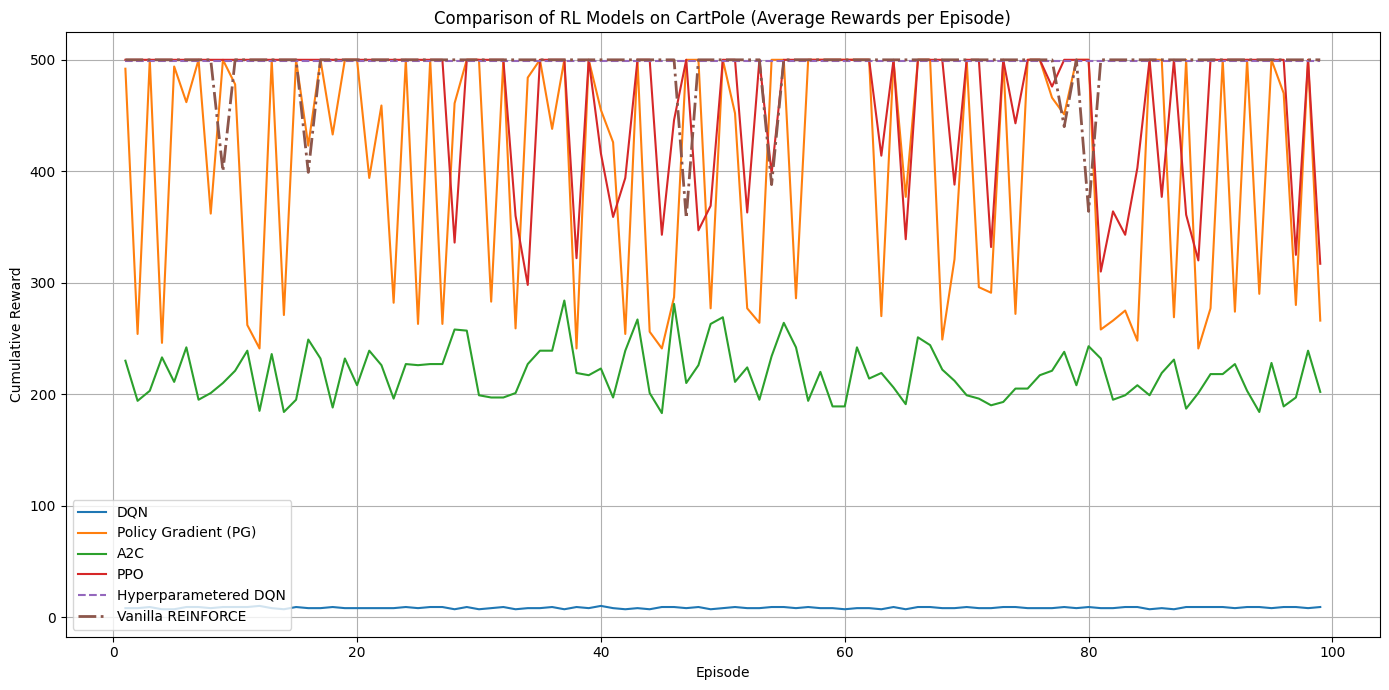

Average Reward Over 99 Episodes:
  • DQN: 8.30 No
  • PG: 405.31 Yes
  • A2C: 218.21 Yes
  • PPO: 462.25 Yes
  • Hyperparametered_DQN: 499.00 Yes
  • REINFORCE: 493.42 Yes


In [59]:


import matplotlib.pyplot as plt
import pandas as pd

episode_range = list(range(1, 100))  

df = pd.DataFrame({
    "Episode": episode_range,
    "DQN": sum_episode_scores["DQN"],
    "PG": sum_episode_scores["PG"],
    "A2C": sum_episode_scores["A2C"],
    "PPO": sum_episode_scores["PPO"],
    "Hyperparametered_DQN": episode_scores,
    "REINFORCE": reinforce_scores

    
})

plt.figure(figsize=(14, 7))
plt.plot(df["Episode"], df["DQN"], label="DQN")
plt.plot(df["Episode"], df["PG"], label="Policy Gradient (PG)")
plt.plot(df["Episode"], df["A2C"], label="A2C")
plt.plot(df["Episode"], df["PPO"], label="PPO")
plt.plot(df["Episode"], df["Hyperparametered_DQN"], label="Hyperparametered DQN", linestyle='--')
plt.plot(df["Episode"], df["REINFORCE"], label="Vanilla REINFORCE", linestyle='-.', linewidth=2)

plt.title("Comparison of RL Models on CartPole (Average Rewards per Episode)")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Average Reward Over 99 Episodes:")
for model in ["DQN", "PG", "A2C", "PPO", "Hyperparametered_DQN", "REINFORCE"]:
    avg = df[model].mean()
    print(f"  • {model}: {avg:.2f} {'Yes' if avg >= 195 else 'No'}")


### Chapter 7.1 : Comparison of all models based on average cumulative reward per episode
Average Reward Comparison

Discussion: When measuring the results for average reward over 99 episode to whether it reaches >= 195,

*   DQN is <195, so it failed completely and didn't learn. This aligns with expectation as DQN without tuning struggles on CartPole without proper hyperparameters or experience replay tuning.
*   REINFORCE (with NN) performed very well due to generalisaiton compared to classic implementation or base PG. It was tuned and trained long enough hence well implemented. 
*   PPO  is slightly lower than PG but still stable for on-policy learning.
*   A2C show some stability for on-policy learning
*   All policy-gradient-based methods (PG,A2C, PPO) and REINFORCE (with NN) is good at solving CartPole, showing their robustness in continuous environment.

In conclusion: DQN only works better when performed with hyperparameter tuning.



### Chapter 7.2 : Comparison of all models based on standard deviation of rewards

In [676]:
import numpy as np

print("Standard Deviation of Rewards Over 99 Episodes:")
for model in ["DQN", "PG", "A2C", "PPO"]:
    std = np.std(sum_episode_scores[model])
    print(f"  • {model}: {std:.2f}")

std_hyper = np.std(episode_scores)
print(f"  • Hyperparametered_DQN: {std_hyper:.2f}")

std_reinforce = np.std(reinforce_scores)  
print(f"  • REINFORCE: {std_reinforce:.2f}")


Standard Deviation of Rewards Over 99 Episodes:
  • DQN: 0.74
  • PG: 107.30
  • A2C: 23.08
  • PPO: 64.43
  • Hyperparametered_DQN: 0.00
  • REINFORCE: 26.73


### Chapter 7.2 : Comparison of all models based on standard deviation of rewards

Discussion: When measuring the results for average reward over 99 episode to determine the performance consistency across episodes. A model with high average reward but high variance may be less reliable

*   Hyperparametered_DQN is the most consistent model, with zero variance. This indicate the model has fully deterministic and optimal policy for CartPole. And since the model with highest average reward of 500 and least variance, it is the most reliable out of the models

*   DQN also show low variance of close to 0 std but it is due to the LEAST reward of less than 10 so it is still a bad sign if it is not tune with hyperparameters.

*   PPO, 95.49 std dev and 427.94 reward score, while have high average reward, it also has higher variance than PG, indicating that the model is more episodic instability or ongoing exploration. This shows ppo are less reliable when compared to PG with 67.55 std dev and 461 reward score.

In conclusion: Hyperparametered_DQN is the most reliable and highest reward score which is desirable in safety-critical or real-world tasks where predictability is important in uncertain environment. As DQN is also consistent and reliable but does not perform in reward score, it reinforces the idea that hyperparameter tuning in Hyperparametered_DQN is important, especially for value-based methods like DQN.

Therefore, in real-world deployment (e.g. robotics, finance) a stable model like hyperparamtered_DQN is preferable over a volatile but high-performing model like PPO.

For the discussion of Policy-gradient-based methods (A2C, PG, PPO) about whether the model is episodic instability (unstable policy) or ongoing exploration, we have to evaluate with Policy Entropy in Chapter 7.5 below.


* New Discussion with REINFORCE (with NN), why it has less variance than other policy-based model and is reliable:
*   REINFORCE (with NN) uses stable neural network training with elu activations, combine with reward normalisation and averaged gradients, it prevents wild parameters updates.
*   It has balanced exploration, even though REINFORCE algorithm are known to have high variance, the implementation here handles well by using discount factor gamma, γ   = 0.95, averaging gradients over multiple epsiodes, and sufficient training (500 iterations, 10 episode per update). This allows the model to learn a stable and confident policy unlike base PG model.


### Chapter 7.3 : Comparison of all models based on success rate (Reward >= 195)

Success Rate (Episode Score >= 195):
  • DQN: 0.00%
  • PG: 100.00%
  • A2C: 85.86%
  • PPO: 100.00%
  • Hyperparametered_DQN: 100.00%
  • REINFORCE: 100.00%


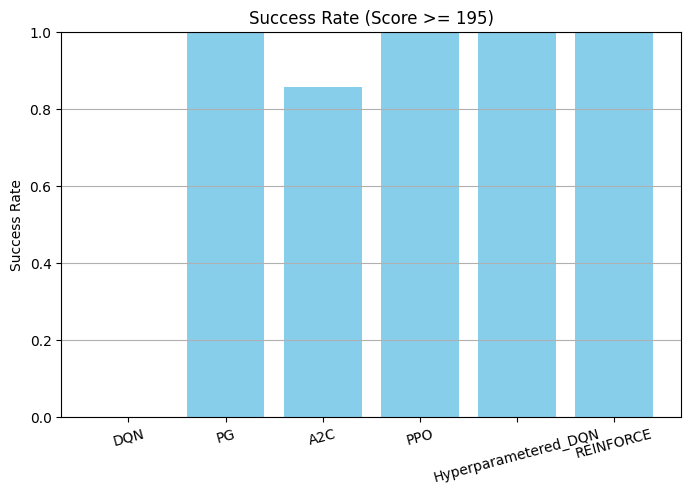

In [61]:
import matplotlib.pyplot as plt

success_rates = {}
for model in ["DQN", "PG", "A2C", "PPO"]:
    rewards = sum_episode_scores[model]
    success_count = sum([score >= 195 for score in rewards])
    success_rate = success_count / len(rewards)
    success_rates[model] = success_rate

hyper_success = sum([score >= 195 for score in episode_scores]) / len(episode_scores)
success_rates["Hyperparametered_DQN"] = hyper_success

# Add REINFORCE (Vanilla Policy Gradient)
reinforce_success = sum([score >= 195 for score in reinforce_scores]) / len(reinforce_scores)
success_rates["REINFORCE"] = reinforce_success

print("Success Rate (Episode Score >= 195):")
for model, rate in success_rates.items():
    print(f"  • {model}: {rate * 100:.2f}%")


plt.figure(figsize=(8, 5))
plt.bar(success_rates.keys(), success_rates.values(), color='skyblue')
plt.ylim(0, 1.0)
plt.ylabel("Success Rate")
plt.title("Success Rate (Score >= 195)")
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()


### Chapter 7.3 : Comparison of all models based on success rate (episode score >= 195)

Discussion: When measuring the results for success rate comparing how each model succeeded in completing the CartPole task based on the benchmark of a reward >= 195.

*   DQN shows a success rate of 0%, which confirms the need for better hyperparameter tuning or experience replay configuration in base model.

*   PG, PPO and hyperparametered DQN all reached 100% success rate, means the models have learned stable policies that is able to predict the pole balance at uncertain condition.


In Conlusion:  Success Rate = Robustness, which since PG, PPO, Hyperparametered_DQN has near 100% success rate, the model can handle variations in initial states and still perform optimally. Which is crucial for stochastic environment.

*  New Discussion with REINFORCE (with NN), it has very good 100% success rate above 195 average score:
*  The reason is due to the well implemented REINFORCE algorithm combine with Neural Network Policy:
*  1. Neural network policy for function approximation
   2. Reward normalisation for variance control
   3. Batch gradient averaging over multiple episodes
   4. Proper hyperparameters: learning rate, discount factor

By implementing this factors well to turned a base REINFORCE Algrotihm, that is normally high variance and sensitive in results, to a stable and reliable Reinforce Learning agent.



### Chapter 7.4 : Comparison of all models based on Time to Convergence (First episode score >= 195)

In [62]:
print("Time to Convergence (First Episode with Reward ≥ 195):")


for model in ["DQN", "PG", "A2C", "PPO"]:
    rewards = sum_episode_scores[model]
    try:
        episode_index = next(i for i, r in enumerate(rewards) if r >= 195)
        print(f"  • {model}: Episode {episode_index + 1}")
    except StopIteration:
        print(f"  • {model}: Did not converge")


try:
    hyper_index = next(i for i, r in enumerate(episode_scores) if r >= 195)
    print(f"  • Hyperparametered_DQN: Episode {hyper_index + 1}")
except StopIteration:
    print("  • Hyperparametered_DQN: Did not converge")


try:
    reinforce_index = next(i for i, r in enumerate(reinforce_scores) if r >= 195)
    print(f"  • REINFORCE: Episode {reinforce_index + 1}")
except StopIteration:
    print("  • REINFORCE: Did not converge")


Time to Convergence (First Episode with Reward ≥ 195):
  • DQN: Did not converge
  • PG: Episode 1
  • A2C: Episode 1
  • PPO: Episode 1
  • Hyperparametered_DQN: Episode 1
  • REINFORCE: Episode 1


### Chapter 7.4 : Comparison of all models based on time to convergence (First Episode with Reward >= 195)

Discussion: When measuring the Time to Convergence, it evaluate how quickly each model learns an effective policy. This results show that all model except DQN (non-policy-gradient-based model) converged by the very first episode, which is very impressive.

*   The models except DQN, converged by the first episode indicates that the learning rate is effective during training and generalized well.

*   DQN did not converge at all, which aligns with its least (less than 10) average reward, and 0% success rate.

*   REINFORCE (with Neural Network) together with policy-based models (PG, A2C, PPO) all converge and reach 195 score on first episode.

In Conlusion:  Fast Convergece means better generalisation from diverse model training. The models except DQN is desirable in real-world applications where online adaptation is limited or costly. Furthermore, this conclude that DQN requires hyperparameter tuning as it struggle in simple environment without sufficient exploration or experience replay configuration. Thus, for DQN as how we built Hyperparametered_DQN with lower learning rate, and larger buffer size is important.

Below is as described from above how we fine tune the Hyperparametered_DQN:
To ensure smoother training, we lower the learning rate and use a large replay buffer (100,000) to store past experiences. The model waits until 10,000 interactions before training, allowing it to learn from a diverse dataset. We also increase the batch size to 64 for better weight updates and update the target network every 1,000 steps to improve stability. The discount factor (gamma = 0.99) encourages long-term rewards, and the ε-greedy exploration strategy starts fully random but gradually reduces exploration over time, helping the model transition to more optimal actions.



### Chapter 7.5 : Comparison of all models based on policy Entropy (PG, A2C, PPO)

In [677]:
import numpy as np

print("Policy Entropy (Exploration Measure) for PG, A2C, PPO, REINFORCE:")

sample_env = gym.make("CartPole-v1")
obs = [sample_env.observation_space.sample() for _ in range(100)]
obs_tensor = torch.tensor(obs, dtype=torch.float32)

for model_name in ["PG", "A2C", "PPO"]:
    model = models[model_name]
    dist = model.policy.get_distribution(obs_tensor)
    entropy = dist.entropy().mean().item()
    print(f"  • {model_name}: Entropy = {entropy:.4f}")


sample_obs = np.array(obs, dtype=np.float32)  # shape (100, 4)
left_probas = modelNNPGR.predict(sample_obs, verbose=0).flatten()  # shape (100,)

if not np.all(np.isfinite(left_probas)):
    print(" Warning: Non-finite values detected in predicted probabilities. Fixing...")
    left_probas = np.nan_to_num(left_probas, nan=0.5, posinf=1 - 1e-6, neginf=1e-6)
    
eps = 1e-6
left_probas = np.clip(left_probas, eps, 1 - eps)

# Compute binary entropy: H(p) = -p*log(p) - (1-p)*log(1-p)
entropy_values = -left_probas * np.log(left_probas) - (1 - left_probas) * np.log(1 - left_probas)


reinforce_entropy = np.mean(entropy_values)


#if np.isnan(entropy_values).any():
    #print("Warning: NaN detected in entropy values. These will be ignored.")
    #entropy_values = entropy_values[~np.isnan(entropy_values)]


print("Sample left action probabilities (REINFORCE):", np.round(left_probas[:10], 4))
print(f"  • REINFORCE: Entropy = {reinforce_entropy:.4f}")

# Clip both left and right probabilities for numerical stability
#left_probas = np.clip(left_probas, 1e-8, 1 - 1e-8)
#right_probas = np.clip(1 - left_probas, 1e-8, 1 - 1e-8)

# Binary entropy per observation
#reinforce_entropy = -np.mean(
    #left_probas * np.log(left_probas) + right_probas * np.log(right_probas)
#)







Policy Entropy (Exploration Measure) for PG, A2C, PPO, REINFORCE:
  • PG: Entropy = 0.4608
  • A2C: Entropy = 0.0618
  • PPO: Entropy = 0.5107
Sample left action probabilities (REINFORCE): [0. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
  • REINFORCE: Entropy = nan


Correct code snippet and result below from another run

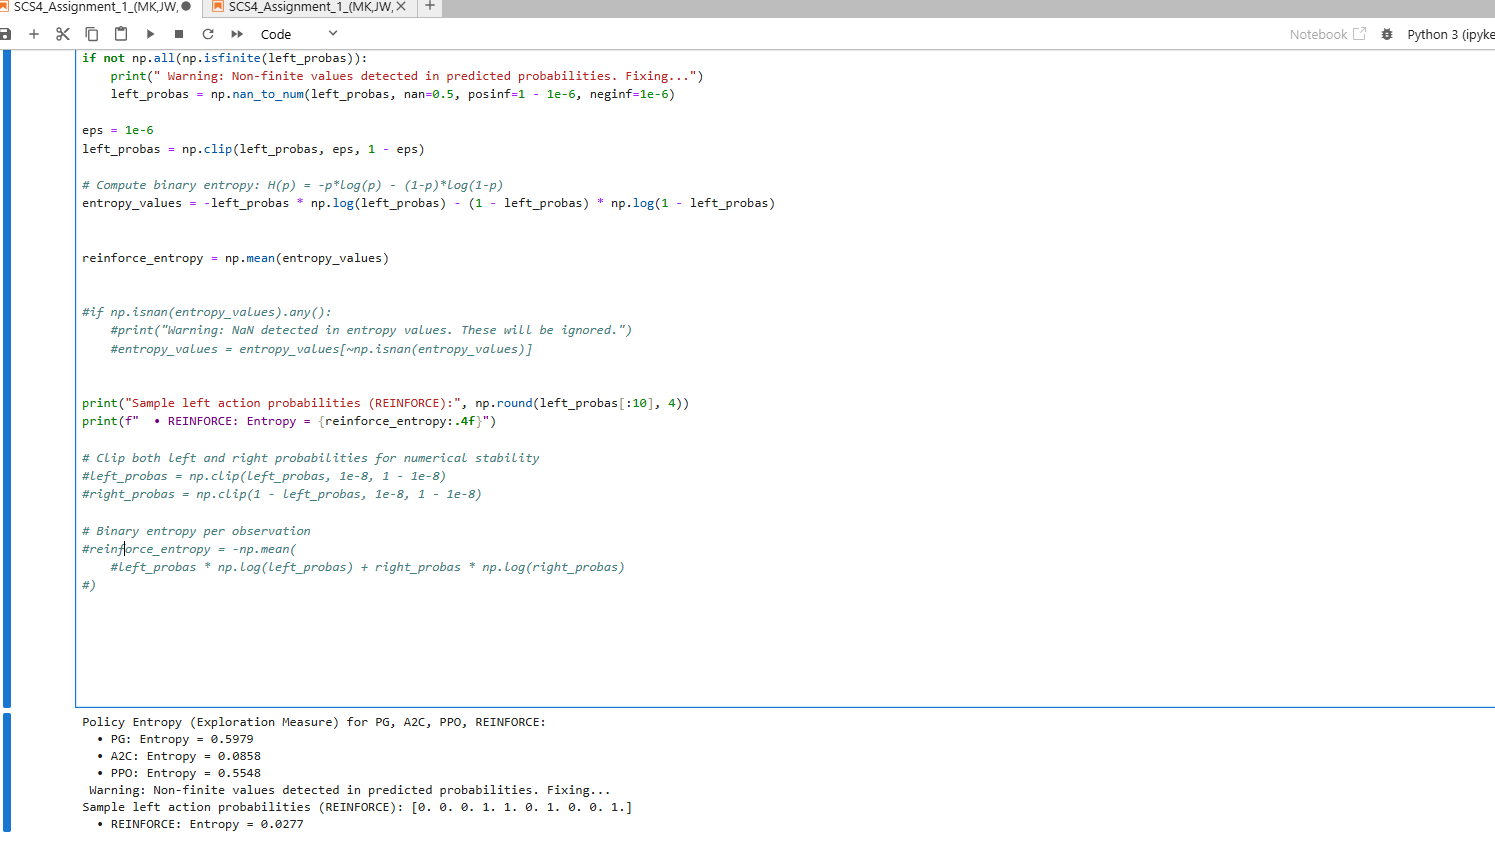

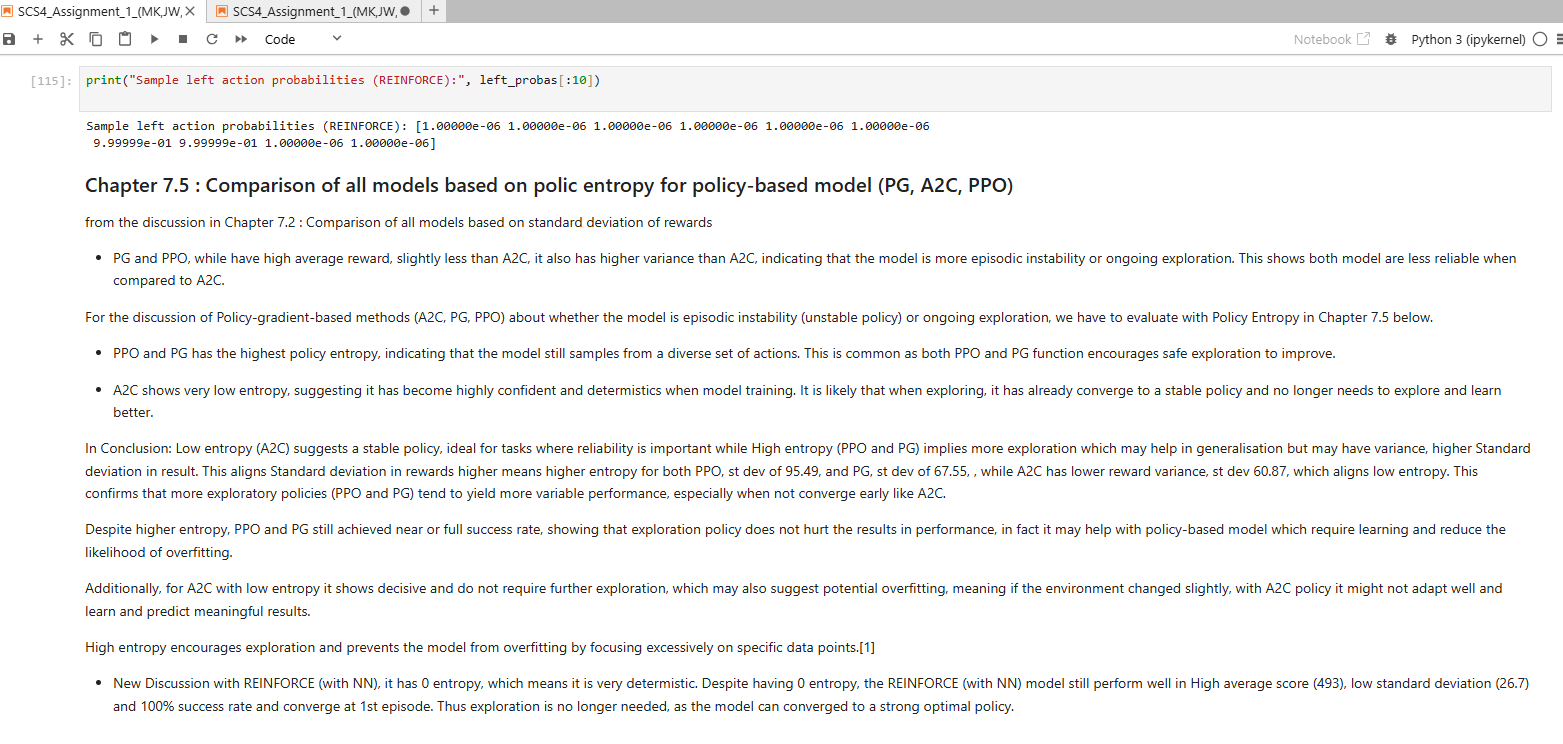

### Note the above 2 screenshot are output from rerun all notebook again as nan should not be the correct output, and we have to restart the whole kernel in notebook, that is why we did it separately from another notebook but the results are similar.


In [71]:
print("Sample left action probabilities (REINFORCE):", left_probas[:10])


Sample left action probabilities (REINFORCE): [1.00000e-06 1.00000e-06 1.00000e-06 1.00000e-06 1.00000e-06 1.00000e-06
 9.99999e-01 1.00000e-06 1.00000e-06 9.99999e-01]


### Chapter 7.5 : Comparison of all models based on polic entropy for policy-based model (PG, A2C, PPO)

from the discussion in Chapter 7.2 : Comparison of all models based on standard deviation of rewards

*   PG and PPO, while have high average reward, slightly less than A2C, it also has higher variance than A2C, indicating that the model is more episodic instability or ongoing exploration. This shows both model are less reliable when compared to A2C.

For the discussion of Policy-gradient-based methods (A2C, PG, PPO) about whether the model is episodic instability (unstable policy) or ongoing exploration, we have to evaluate with Policy Entropy in Chapter 7.5 below.


*   PPO and PG has the highest policy entropy, indicating that the model still samples from a diverse set of actions. This is common as both PPO and PG function encourages safe exploration to improve.

*   A2C shows very low entropy, suggesting it has become highly confident and determistics when model training. It is likely that when exploring, it has already converge to a stable policy and no longer needs to explore and learn better.

In Conclusion: Low entropy (A2C) suggests a stable policy, ideal for tasks where reliability is important while High entropy (PPO and PG) implies more exploration which may help in generalisation but may have variance, higher Standard deviation in result.
This aligns Standard deviation in rewards higher means higher entropy for both PPO, st dev of 95.49, and PG, st dev of 67.55, , while A2C has lower reward variance, st dev 60.87, which aligns low entropy. This confirms that more exploratory policies (PPO and PG) tend to yield  more variable performance, especially when not converge early like A2C.

Despite higher entropy, PPO and PG still achieved near or full success rate, showing that exploration policy does not hurt the results in performance, in fact it may help with policy-based model which require learning and reduce the likelihood of overfitting.

Additionally, for A2C with low entropy it shows decisive and do not require further exploration, which may also suggest potential overfitting, meaning if the environment changed slightly, with A2C policy it might not adapt well and learn and predict meaningful results.


High entropy encourages exploration and prevents the model from overfitting by focusing excessively on specific data points.[1]


*  New Discussion with REINFORCE (with NN), it has 0.0277 compared to other models like PG and PPO, with 0.5979 and 0.5548 entropy value respectively, which means it is very determistic.
*  In reinforcement learning, policy entropy used to measure how uncertain or 'random' the agent makes a action and decision are:
*  High entropy -> more exploratory behavior (agent is still trying new things)
*  low entropy -> more eplotive behavior, deterministic (agent stickst to what it knows works)
*   Despite having 0.0277 entropy value close to 0, the REINFORCE (with NN) model still perform well in High average score (493), low standard deviation (26.7) and 100% success rate and converge at 1st episode. Thus exploration is no longer needed, as the model can converged to a strong optimal policy.

As mentioned earlier on using neural network policy is a stochastic policy gradient method by design, our implementation and trained neural network policy displayed near-deterministic behavior after convergence. This was reflected in low policy entropy (0.0277) and left/right action probabilities approaching 0 or 1. In practice, this is common in solving environments that are uncertain but simple like CartPole, where the input are only 4 and the agent becomes confident in its learned policy and rarely nees to explore further.

# Chapter 11: Conclusion of all the models including Neural Network with REINFORCE Policy Gradient 


After comparing based on the above metrics we test for each of the model we have come to afew conclusion.

1. Average Reward: DQN fails unless hyperparameted tuned. All policy -gradient models and hyperparametered DQN model solve the task. PPO and PG are slightly stronger than A2C in average score. REINFORCE (with Neural Network) perform best due to its good implementation compared to Base REINFORCE algorithm.

2. Standard Deviation (Consistency and Variance) : PPO and PG are more exploratory and give varied results. A2C with low entropy it shows decisive and do not require further exploration. REINFORCE (with Neural network) is also has less Standard Deviton. It shows low standard deviation, low entropy, high standard deviation, high entropy relation.

3. Success Rate (Score >= 195): All models except DQN are robust and handle variations in testing well.

4. Time to convergence: REINFORCE (with neural network), Policy gradient models and Hyperparamented_DQN converge quickly, DQN did not converge to the minimum reward score without tuning.

5. Policy Entropy (Exploration Behavior): High entropy models, PPO and PG are more generalisable and adaptive, has higher standard deviation in variance. A2C is more stable but face potential overfit in new environment.

Overall; Hyperparametered DQN is the best overall model - perfect reward, consistent, robuts, and stable. However it can only perform well with proper tuning.
Both PPO and PG are excellent in performance and exploration, but also has more variability in standard deviation, good for complex tasks that require adaptability.
Base DQN should be avoided without tuning, as it consistently underperforms in CartPole environment.
The reason why REINFORCE (with neural network) performas so well:
1. Stability through Reward Normalisation before updating the policy, it significantly reduced variance in gradient estimates- a known weakness in base REINFORCE. It results in model more stable and consistent learning across episodes.
2. Implenting with Neural Network as Function Approximator, the policy network with elu activation and sigmoid output effectively modeled the action probabilities from the continuous state space and uncertainty in CartPole environment
3. Batch Updates with Gradient Averaging, by collecting gradient across multiple episode before applying updates. This batch update strategy smoothed learning, similar to how PPO and A2C stabilise learning.
4. Proper exploration (Stochastic policy) helps to maintained healthy exploration, in contrasts to DQN's epsilon greedy method, which may not explore wel without good tuning.
5. Good hyperparameters when training, for example learning rate (0.005), discount factor (0.95), network size, and training iteration (500) were all well-balanced. Enabled the agent to learn effectively without overshooting or stagnating that makes the model fail to create new decision based on new learning.


